<a href="https://colab.research.google.com/github/EzePolacco/EzePolacco/blob/main/Ejercicio_An%C3%A1lisis_de_encuesta_sueldos_Sysarmy_2022_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SysArmy - Análisis de encuesta 2022.02

## 1. Carga y sanitización de datos

###  1.1. Definimos los metadatos asociados al dataset que vamos a analizar

In [ ]:
!pip install funpymodeling
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars

In [ ]:
#%load_ext nb_black
#csv_url = 'https://drive.google.com/file/d/1WxK0nRXAGT-i6gTRA8bBne8bsp9iCJle/view?usp=sharing'
#csv_url = "https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/csv/argentina/2021.02.csv"
csv_url = 'https://raw.githubusercontent.com/EzePolacco/ejercicio_openqube/9d4a0d4cc729b049b14222e0622784c766ab03df/2022.2%20-%20sysarmy%20-%20Encuesta%20de%20remuneracio%CC%81n%20salarial%20Argentina%20-%20Argentina.csv'
dataset_metadata = {
    "year": 2022,
    "part": 2,
    "skiprows": 10,
    "publish_date": "2022-08-22",
    "minimum_salary": 47850,  # https://es.wikipedia.org/wiki/Anexo:Salario_m%C3%ADnimo_en_Argentina
}

### 1.2. En base a los metadatos, cargamos el CSV, limpiamos columnas y las transformamos

In [ ]:
import pandas as pd
import io
import requests
from time import sleep
import matplotlib.pyplot as plt


raw_dataframe = None
source = requests.get(
    csv_url.format(dataset_metadata["year"], dataset_metadata["part"])
).content
raw_dataframe = pd.read_csv(
    io.StringIO(source.decode("utf-8")),
    skiprows=dataset_metadata["skiprows"],
    thousands=".",
   decimal=",",
)




# resultados que no pertenezcan a Argentina quedan fuera de este análisis
columns_to_remove = [
    "Bolivia",
    "Chile",
    "Colombia",
    "Cuba",
    "Costa Rica",
    "Ecuador",
    "El Salvador",
    "Guatemala",
    "Honduras",
    "México",
    "Nicaragua",
    "Panamá",
    "Paraguay",
    "Perú",
    "Puerto Rico",
    "República Dominicana",
    "Uruguay",
    "Venezuela",
]

#raw_dataframe.drop(columns_to_remove, axis=1, inplace=True)

import re

regex_white_chars = re.compile(r"\s+")
regex_non_alphanum = re.compile(r"\W+_?", re.I)

raw_dataframe.columns = (
    raw_dataframe.columns.str.strip()
    .str.lower()
    .str.replace(regex_white_chars, "_")
    .str.replace(regex_non_alphanum, "")
    .str.translate(
        "ñáéíóú".maketrans({"ñ": "n", "á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u"})
    )
)

# Eliminamos los datos que no pertenezcan a Argentina
raw_dataframe = raw_dataframe[raw_dataframe["estoy_trabajando_en"] == "Argentina"]

dataframe = raw_dataframe.copy()

display([column for column in dataframe.columns])

['estoy_trabajando_en',
 'donde_estas_trabajando',
 'dedicacion',
 'tipo_de_contrato',
 'ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local',
 'ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local',
 'pagos_en_dolares',
 'si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron',
 'pagos_en_criptomonedas',
 'que_porcentaje_o_monto_recibis_en_criptomonedas',
 'recibis_algun_tipo_de_bono',
 'a_que_esta_atado_el_bono',
 'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2022',
 'de_que_fue_el_ajuste_total_acumulado',
 'en_que_mes_fue_el_ultimo_ajuste',
 'como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior',
 'con_que_beneficios_contas',
 'que_tan_conforme_estas_con_tus_ingresos_laborales',
 'trabajo_de',
 'anos_de_experiencia',
 'antigüedad_en_la_empresa_actual',
 'tiempo_en_el_puesto_actual',
 'cuantas_personas_a_cargo_tenes',
 'plataformas_que_utilizas_en_tu_puesto_actual',
 'lenguajes_de_programacion_o_tecnologias_que

### 1.3. Echamos un vistazo al dataframe previo a sanitizarlo

In [ ]:
raw_dataframe.T.head(22)

,0,1,2,3,4,5,6,7,8,9,...,5348,5349,5350,5351,5352,5353,5354,5355,5356,5357
estoy_trabajando_en,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,...,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina
donde_estas_trabajando,Catamarca,Chaco,Chaco,Chaco,Chaco,Chaco,Chaco,Chaco,Chaco,Chaco,...,Tucumán,Tucumán,Tucumán,Tucumán,Tucumán,Tucumán,Tucumán,Tucumán,Tucumán,Tucumán
dedicacion,Full-Time,Full-Time,Full-Time,Full-Time,Full-Time,Full-Time,Full-Time,Full-Time,Part-Time,Full-Time,...,Full-Time,Full-Time,Part-Time,Full-Time,Full-Time,Full-Time,Full-Time,Full-Time,Full-Time,Part-Time
tipo_de_contrato,Staff (planta permanente),Remoto (empresa de otro país),Staff (planta permanente),Remoto (empresa de otro país),Staff (planta permanente),Staff (planta permanente),Staff (planta permanente),Staff (planta permanente),Staff (planta permanente),Remoto (empresa de otro país),...,Remoto (empresa de otro país),Remoto (empresa de otro país),Staff (planta permanente),Tercerizado (trabajo a través de consultora o ...,Staff (planta permanente),Staff (planta permanente),Staff (planta permanente),Remoto (empresa de otro país),Staff (planta permanente),Freelance
ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,300000,900000,120000,440000,140000,633000,110000,157000,55000,190000,...,300000,800,50,110000,120000,311.7,150000,230000,450989,60000
ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,245000,850000,115000,NaN,125000,395000,90000,127000,45650,178000,...,294000,NaN,50,91000,90000,214.8,93000,190900,297750,45000
pagos_en_dolares,NaN,Cobro todo el salario en dólares,NaN,Cobro todo el salario en dólares,NaN,Cobro parte del salario en dólares,Mi sueldo está dolarizado (pero cobro en moned...,NaN,NaN,Cobro todo el salario en dólares,...,Cobro todo el salario en dólares,Cobro todo el salario en dólares,NaN,NaN,NaN,Cobro parte del salario en dólares,Cobro parte del salario en dólares,Cobro parte del salario en dólares,Cobro parte del salario en dólares,NaN
si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,NaN,300,NaN,220,NaN,NaN,125,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,128,"134,89",130,"131,55",NaN
pagos_en_criptomonedas,NaN,NaN,NaN,Cobro todo el salario criptomonedas,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
que_porcentaje_o_monto_recibis_en_criptomonedas,NaN,NaN,NaN,100%,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.4. Sanitizamos/normalizamos datos que encontramos mal formados o repetidos

In [ ]:
import re


def normalize_dataframe_column(df_in, column_name, regex_assign_map):
    """
  Given a Dataframe (df), a column name that identifies the column to sanitize,
  applies an in-place replacement for each pair regex-value in the map
  """
    df_out = df_in.copy()
    for regex, value in regex_assign_map.items():
        compiled_regex = re.compile(regex, re.I)
        mask = df_in[column_name].str.strip().str.match(compiled_regex, na=False)
        df_out.loc[mask, column_name] = value

    # debug
    total, final = len(df_in[column_name].unique()), len(df_out[column_name].unique())
    display("reduced in {:02f}".format((total - final) / total))
    return df_out


def normalize_dataframe_column_replace(df_in, column_name, regex_replace_map):
    """
  Given a Dataframe (df), a column name that identifies the column to sanitize,
  applies an in-place replacement for each pair regex-value in the map
  """
    df_out = df_in.copy()
    for regex, pattern in regex_replace_map.items():
        compiled_regex = re.compile(regex, re.I)
        df_out[column_name] = (
            df_out[column_name].str.strip().str.replace(compiled_regex, pattern)
        )

    # debug
    total, final = len(df_in[column_name].unique()), len(df_out[column_name].unique())
    display("reduced in {:02f}".format((total - final) / total))
    return df_out

#### 1.4.1. Carreras

In [ ]:
dataframe = normalize_dataframe_column_replace(
    dataframe,
    "carrera",
    {
        "(Derecho|Abogac[íi]a|abogad.)": "Derecho",
        "(Contador.*)": "Contador Público",
        "(Arquitect(o|a|ura))": "Arquitectura",
        "(Lic.*)?Psicolog[íi]a": "Licenciatura en Psicología",
        "(Lic.*)?Marketing": "Licenciatura en Marketing",
        ".*Comunicación": "Licenciatura en Comunicación",
        "Letras": "Licenciatura en Letras",
        "Tec.*Infraestructuras{0,2}": "Tecnicatura Superior en Soporte de Infraestructuras",
        "(lic.*qu[ií]mica)": "Licenciatura en Química",
        "^(RRHH|Trabajo)": "Licenciatura en Relaciones del Trabajo",
        "(Lic.*)?Administraci[oó]n( de empresas)?": "Licenciatura en Administración de Empresas",
        "Ed.*f[ií]sica": "Educación Física",
        "Licenciatura en Cienciasdela Computación": "Licenciatura en Ciencias de la Computación",
        "Licenciatura en Ciencias dela Computación": "Licenciatura en Ciencias de la Computación",
        "(ningun(a|o)|-)": "DELETEME",
        "Lic.* Matemáticas?": "Licenciatura en Matemática",
        "(lic.*)econom[íi]a": "Licenciatura en Economía",
        "ingenier[íi]a de sistemas": "Ingeniería en Sistemas",
        "^(.*)\.$": "\\1",
    },
)

df = dataframe["carrera"].value_counts(sort=True)
display(df[:55])

'reduced in 0.136585'

Ingeniería en Sistemas de Información            452
Ingeniería en Informática                        255
Analista de Sistemas                             204
Licenciatura en Sistemas de Información          156
Licenciatura en Ciencias de la Computación       144
Licenciatura en Informática                      113
Ingeniería Electrónica                            99
Tecnicatura en Programación                       98
Tecnicatura Superior en Programación              65
Ingeniería en Computación                         53
Diseño Gráfico                                    52
Licenciatura en Administración de Empresas        51
Licenciatura en Análisis de Sistemas              34
Ingeniería Industrial                             30
Tecnicatura Superior en Sistemas Informáticos     30
Tecnicatura en Informática                        30
Diseño Multimedial                                25
Analista Programador Universitario                24
Tecnicatura Superior en Análisis de Sistemas  

#### 1.4.2. Universidades

In [ ]:
# En Mendoza se asocia UM a la Universidad de Mendoza, y en Buenos Aires, a la Universidad de Morón
mask = dataframe.eval(
    'universidad in ["UM", "Um"] and donde_estas_trabajando == "Mendoza"'
)
dataframe.universidad.loc[mask] = "Universidad Nacional de Mendoza"
display(dataframe[mask].universidad)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Series([], Name: universidad, dtype: object)

In [ ]:
dataframe = normalize_dataframe_column(
    dataframe,
    "universidad",
    {
        "(UNSJ|.*Nacional de San Juan)": "UNSJ - Universidad Nacional de San Juan",
        "IRSO": "IRSO - Instituto Raúl Scalabrini Ortíz",
        "(UNPSJB|.*Patagonia San Juan Bosco.*)": "UNPSJB - Universidad Nacional de la Patagonia San Juan Bosco",
        "(UNSL|Universidad Nacional de San Luis)": "UNSL - Universidad Nacional de San Luis",
        "IFTS18": "IFTS18 - Instituto de Formación Técnica Superior N°18",
        "UCASAL": "UCASAL - Universidad Católica de Salta",
        "Universidad de Mendoza": "UM - Universidad de Mendoza",
        "UNTREF": "UNTREF - Universidad Nacional de Tres de Febrero",
        "(UNL[uU]|Universidad Nacional de Luj[aá]n)": "UNLu - Universidad Nacional de Luján",
        "(UAA|.*Atl[aá]ntida.*)": "UAA - Universidad Atlántida Argentina",
        "([fF]?IUPFA)": "IUPFA - Instituto Universitario de la Policía Federal Argentina",
        "([uU]?FASTA)": "FASTA - Fraternidad de Agrupaciones Santo Tomás de Aquino",
        "(UCSE)": "UCSE - Universidad Católica de Santiago del Estero",
        "(ISIV|.*Virasoro.*)": "ISIV - Instituto Superior de Informática Virasoro",
        "(UN[Aa]M)": "UNaM - Universidad Nacional de Misiones",
        "(-|ninguna)$": "DELETEME",
    },
)

df = dataframe["universidad"].value_counts(sort=True)
display(df[:60])

'reduced in 0.095445'

UTN - Universidad Tecnológica Nacional                                        586
UBA - Universidad de Buenos Aires                                             375
UNLaM - Universidad Nacional de La Matanza                                    102
UADE - Universidad Argentina De la Empresa                                     94
UNLP - Universidad Nacional de La Plata                                        79
UNC - Universidad Nacional de Córdoba                                          75
UP - Universidad de Palermo                                                    56
UAI - Universidad Abierta Interamericana                                       53
Universidad Siglo 21                                                           45
ORT                                                                            43
UNR - Universidad Nacional de Rosario                                          37
UNS - Universidad Nacional del Sur                                             29
UNQ - Universida

#### 1.4.3. Experiencia

In [ ]:
dataframe["años_de_experiencia"] = dataframe["anos_de_experiencia"].astype(int)
dataframe["antigüedad_en_la_empresa_actual"] = dataframe["antigüedad_en_la_empresa_actual"].astype(
    int
)
dataframe["tiempo_en_el_puesto_actual"] = dataframe["tiempo_en_el_puesto_actual"].astype(
    int
)
dataframe

,estoy_trabajando_en,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,pagos_en_criptomonedas,que_porcentaje_o_monto_recibis_en_criptomonedas,...,carrera,universidad,participaste_de_algun_boot_camp,si_participaste_de_un_boot_campque_carrera_estudiaste,tenes_guardias,cuanto_cobras_por_guardia,porcentajebruto_o_neto,tengo_edad,me_identifico_genero,años_de_experiencia
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000,245000,NaN,NaN,NaN,NaN,...,Licenciatura en Comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis,10
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000,850000,Cobro todo el salario en dólares,300,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis,2
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000,115000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis,2
3,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),440000,NaN,Cobro todo el salario en dólares,220,Cobro todo el salario criptomonedas,100%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Varón Cis,1
4,Argentina,Chaco,Full-Time,Staff (planta permanente),140000,125000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5353,Argentina,Tucumán,Full-Time,Staff (planta permanente),311.7,214.8,Cobro parte del salario en dólares,128,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Mujer Cis,6
5354,Argentina,Tucumán,Full-Time,Staff (planta permanente),150000,93000,Cobro parte del salario en dólares,"134,89",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,Mujer Cis,7
5355,Argentina,Tucumán,Full-Time,Remoto (empresa de otro país),230000,190900,Cobro parte del salario en dólares,130,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Mujer,7
5356,Argentina,Tucumán,Full-Time,Staff (planta permanente),450989,297750,Cobro parte del salario en dólares,"131,55",NaN,NaN,...,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,NaN,NaN,No,0.0,Neto,39,hombre,14


#### 1.4.4. Regiones

In [ ]:
dataframe = normalize_dataframe_column(
    dataframe,
    "donde_estas_trabajando",
    {"(GBA|Provincia de Buenos Aires)": "Buenos Aires",},
)

display(dataframe["donde_estas_trabajando"].unique())

'reduced in 0.000000'

array(['Catamarca', 'Chaco', 'Chubut', 'Ciudad Autónoma de Buenos Aires',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Buenos Aires', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
       'Tierra del Fuego', 'Tucumán'], dtype=object)

#### 1.4.5. Discapacidad

In [ ]:
"""dataframe = normalize_dataframe_column(
    dataframe,
    "tenes_algun_tipo_de_discapacidad",
    {
        "^(_|-|no( tengo)?|ningun[oa]|nada|0|ni)$": None,
        ".*auditiv[oa].*": "Auditiva",
        ".*visual.*": "Visual",
        "mental": "Mental",
        "motriz": "Motriz",
        "vis?ceral": "Visceral",
        "^(sobrepeso|obesidad)": "Obesidad",
    },
)

df = dataframe["tenes_algun_tipo_de_discapacidad"].value_counts(sort=True)
display(df[:6])"""

'dataframe = normalize_dataframe_column(\n    dataframe,\n    "tenes_algun_tipo_de_discapacidad",\n    {\n        "^(_|-|no( tengo)?|ningun[oa]|nada|0|ni)$": None,\n        ".*auditiv[oa].*": "Auditiva",\n        ".*visual.*": "Visual",\n        "mental": "Mental",\n        "motriz": "Motriz",\n        "vis?ceral": "Visceral",\n        "^(sobrepeso|obesidad)": "Obesidad",\n    },\n)\n\ndf = dataframe["tenes_algun_tipo_de_discapacidad"].value_counts(sort=True)\ndisplay(df[:6])'

#### 1.4.5. Roles

In [ ]:
dataframe = normalize_dataframe_column_replace(
    dataframe,
    "trabajo_de",
    {
        "Project Manager.*": "Project Manager",
        "Director, Product Manager, Project Manager": "Manager / Director",
        "Technical Leader.*": "Technical Leader",
        "Team Leader.*": "Technical Leader",
        "Full ?Stack Developer": "Developer",
        "Seguridad Inform[aá]tica": "Infosec",
        "(profesor|instructor|educador|docente|capacitador.*)": "Docente",
        "^(Soporte T[ée]cnico|Technical support|Support)": "Technical Support",
        "Software Engineer": "Developer",
        "(Analista )?programador": "Developer",
        "Analista Funcional": "Functional Analyst",
        "Technical Functional Analyst": "Functional Analyst",
        "administrativo": "Administrativo",
        "^cto.*": "CTO",
        "Asistant": "Assistant",
        "helpdesk": "HelpDesk",
        "(Analista de seguridad|Security.*)": "Infosec",
        "BI Leader": "BI Analyst / Data Analyst"
    },
)

df = dataframe["trabajo_de"].value_counts(sort=True)
display(df[0:80])

'reduced in 0.059322'

Developer                                                             2170
SysAdmin / DevOps / SRE                                                534
Technical Leader                                                       344
QA / Tester                                                            286
Manager / Director                                                     190
                                                                      ... 
Monitorización                                                           1
Embedded Engineer                                                        1
QA Test Lead & Scrum Master                                              1
Accesos                                                                  1
Soy Functional Analyst pero hago diseño ux ui  y front end también       1
Name: trabajo_de, Length: 80, dtype: int64

#### 1.4.6. Salario (corrección de numeración)

In [ ]:
# Algunos salarios están cargados, pareciera ser, en miles

#### 1.4.7. Sueldo dolarizado (modificado)

In [ ]:
mask = dataframe.pagos_en_dolares.str.contains("dolarizado", na=False)
column_name = "sueldo_dolarizado"

dataframe.loc[~mask, column_name] = False
dataframe.loc[mask, column_name] = True
dataframe.loc[:, column_name] = dataframe["sueldo_dolarizado"].astype(bool)


### 1.5. Agregamos columnas calculadas

In [ ]:
dataframe["seniority"] = pd.cut(
    dataframe["anos_de_experiencia"].values,
    [-1, 2, 5, 50],
    labels=["Junior", "Semi-Senior", "Senior"],
)
display(dataframe["seniority"])

0       Senior
1       Junior
2       Junior
3       Junior
4       Junior
         ...  
5353    Senior
5354    Senior
5355    Senior
5356    Senior
5357    Junior
Name: seniority, Length: 5358, dtype: category
Categories (3, object): ['Junior' < 'Semi-Senior' < 'Senior']

### 1.6. Eliminamos outliers

In [ ]:
salary_debug_columns = [
    
    "anos_de_experiencia",
    "estoy_trabajando_en",
    "tipo_de_contrato",
    "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local",
]


def remove_outlier(df_in, col_name, iqr_factor=1.5):
    """
  IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
  accept a dataframe, remove outliers, return cleaned data in a new dataframe
  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
  """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # interquartile range
    fence_low = q1 - iqr_factor * iqr
    fence_high = q3 + iqr_factor * iqr
    df_inliers = df_in.loc[
        (df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)
    ]
    df_outliers = df_in.loc[
        (df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)
    ]
    return df_inliers, df_outliers

#### 1.6.1. Salarios

In [ ]:
dataframe.loc[:, "_ult"] = dataframe[
    "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"
]

In [ ]:

dataframe["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"] = (
    dataframe["_ult"]
    .str.replace(".", "")
    .str.replace(",", "")
    .str.replace("$", "")
    .str.replace(r"[^0-9\.]", "")
    .str.replace(r"^\s*$", "0")
    .fillna(0)
    .astype(float)
)

df_inliers, df_outliers = remove_outlier(
    dataframe, "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local", 3.5
)

# inliers percent over total
display(len(df_inliers) / len(dataframe))

# display outliers
#display(df_outliers[salary_debug_columns])

<ipython-input-1249-cbadf204da85>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dataframe["_ult"]
<ipython-input-1249-cbadf204da85>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe["_ult"]


0.9468085106382979

In [ ]:
minimum_salary = dataset_metadata["minimum_salary"]
df_outliers_lower_limit = df_inliers.query(
    "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local < @minimum_salary/2.0"
)
display(len(df_outliers_lower_limit))
#display(df_outliers_lower_limit[salary_debug_columns])   #1
df_inliers_lower_limit = df_inliers.query(
    "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local >= @minimum_salary/2.0"
)

dataframe = df_inliers_lower_limit

259

Gender Preprocessing

In [ ]:
df = dataframe

gender_txs = {
    "Hombre Cis": "(varón cis|varón|varon|masculino|varón cis heterosexual|.*varón cis.*|.*varon y punto|macho alfa|.*soy varon|.*helic[oó]ptero|.*apache|machote|optimus prime|macho|sexo masculino|peronista|humano masculino|velociraptor|.*pekemen|.*hijo de puta|.*gargola|tortuga|robot mutante|unicornio|.*poste de luz|dinosaurio|hormiga|.*interplanetario|.*ventilador de techo|.*persona|herero)",
    "Mujer Cis": "(mujer cis|mujer|soy mujer)",
    "Hombre Trans": "varón trans",
    "Mujer Trans": "(mujer trans|travesti|femenino pero mi DNI dice masculino|trans queer)",
    "Prefiero No Decir": "(prefiero no decir|les importa\?|completamente irrelevante|.*pelotude[zs].*|basta|No entiendo|.*preguntas de mierda|.*nada que ver|.*romper los huevos|.*boludeces|no tiene sentido esto|wtf|que puta te importa|no es importante|es necesario esto|dejen de romper|dejen de preguntar|que pelotudés|no interesa|.*esta pregunta pelotuda|ns/nc|.*boludez|.*que mierda es esto|no tengo ni idea|nose cual elegir|.*que sea para pelotudos|.*no se que poner|\?\?\?|.*crear etiquetas|.*me marearon|.*me visto de mujer|^m$|Otre|.*idioma inclusivo|y el gay|.*pregunta mas rebuscada)",
    "No Binarie": "no binarie",
    "Agénero": "agénero",
}

for label, regex in gender_txs.items():
    ix = df.me_identifico_genero.str.match(regex, case=False,na=False)
    df.loc[ix, "me_id_extra"] = label


df.me_id_extra.value_counts() / len(df)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Hombre Cis           0.750312
Mujer Cis            0.169506
Prefiero No Decir    0.039053
No Binarie           0.005609
Agénero              0.002908
Hombre Trans         0.002493
Mujer Trans          0.001039
Name: me_id_extra, dtype: float64

In [ ]:
# these are the genders that have at least 0.5% of responses
enough_data = ["Hombre Cis", "Mujer Cis", "Prefiero No Decir", "No Binarie"]

### 1.7 Helper functions

In [ ]:
def invert_non_representative_values(
    dataframe,
    column,
    representative_values,
    value_column="salario_mensual_o_retiro_bruto_en_tu_moneda_local",
):
    df.loc[
        df.eval("{} not in @representative_values".format(column)), value_column
    ] *= -1
    return df


def filter_valid_top_values(
    dataframe,
    column,
    top_values,
    value_column="salario_mensual_o_retiro_bruto_en_tu_moneda_local",
):
    return dataframe.query(
        '{} in @top_values & {} != "DELETEME"'.format(column, column)
    )


def get_two_dimensional_median_with_outliers_filtered(
    dataframe, group_by_columns, value_column="salario_mensual_o_retiro_bruto_en_tu_moneda_local"
):
    """
  Given a dataframe, groups data by the first given column in group_by_columns, computes median
  and sets to zero all values that have less than 5% of representation on the second column
  """
    dfl = (
        dataframe.groupby(group_by_columns)
        .size()
        .to_frame()
        .groupby(level=0)
        .apply(lambda x: x / float(x.sum()))
        .rename(columns={0: "population"})
        .query("population > 0.05")
        .drop(columns=["population"])
        .reset_index()
    )
    dfr = (
        dataframe.groupby(group_by_columns)
        .median()[value_column]
        .fillna(0)
        .to_frame()
        .reset_index()
    )
    return (
        pd.merge(dfl, dfr, on=group_by_columns, how="inner")
        .groupby(group_by_columns)
        .min()
        .unstack(group_by_columns[1])[value_column]
        .fillna(0)
    )

## 2. Análisis de resultados

Análisis exploratorio de los datos, los resultados se exportan en un JSON llamado 'charts'

In [ ]:
charts = {
    "total_surveyed": len(raw_dataframe),
    "total_analyzed_surveyed": len(dataframe),
}

display(charts)


def to_rechart(df, max=0):
    """
  if max is set, groups the exceeded rows into 'Otros' column, summing values
  """
    if max != 0:
        # df = df.sort_values(by, ascending=False)
        others = df[max:].sum()
        df = df[:max]
        df.loc["Otros"] = others
    return {
        "data": [
            {"name": str(name), **(data if isinstance(data, dict) else {"value": data})}
            for name, data in df.T.to_dict().items()
        ],
    }

{'total_surveyed': 5358, 'total_analyzed_surveyed': 4814}

### 2.1. Perfiles

#### 2.1.1. Regiones

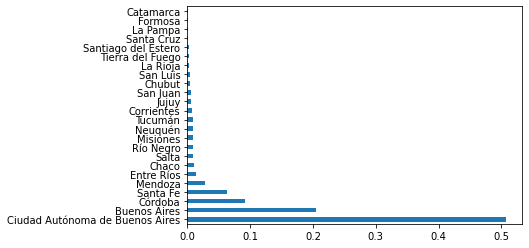

In [ ]:
df = dataframe["donde_estas_trabajando"].value_counts(normalize=True, sort=True)

df.plot(kind="barh", logx=False)
charts["regions_percent"] = to_rechart(df)

#### 2.1.2. Roles (Posición, Open Source, Hobbie)

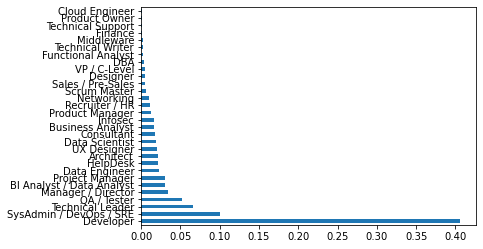

In [ ]:
df = dataframe["trabajo_de"].value_counts(normalize=True, sort=True)

df[:30].plot.barh()
charts["roles_percent"] = to_rechart(df, 30)

In [ ]:
"""df = dataframe["programas_como_hobbie"].value_counts(normalize=True, sort=True)

df.plot.barh()
charts["hobbie_percent"] = to_rechart(df)"""

'df = dataframe["programas_como_hobbie"].value_counts(normalize=True, sort=True)\n\ndf.plot.barh()\ncharts["hobbie_percent"] = to_rechart(df)'

#### 2.1.3. Experiencia

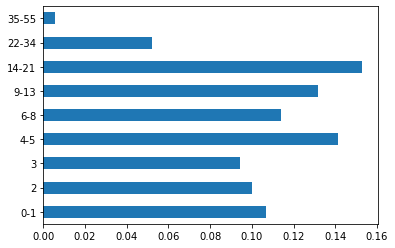

In [ ]:
df = dataframe["anos_de_experiencia"].copy()
df = df.groupby(
    pd.cut(
        df.values,
        [0, 1, 2, 3, 5, 8, 13, 21, 34, 55],
        labels=["0-1", "2", "3", "4-5", "6-8", "9-13", "14-21", "22-34", "35-55"],
    )
).count() / len(df)

df.plot.barh()
charts["experience_years_percent"] = to_rechart(df.sort_index())

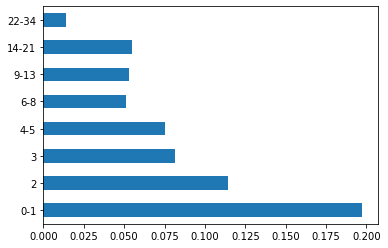

In [ ]:
df = dataframe["antigüedad_en_la_empresa_actual"].copy()
df = df.groupby(
    pd.cut(
        df.values,
        [0, 1, 2, 3, 5, 8, 13, 21, 34],
        labels=["0-1", "2", "3", "4-5", "6-8", "9-13", "14-21", "22-34"],
    )
).count() / len(df)

df.plot.barh()
charts["experience_years_in_company"] = to_rechart(df.sort_index())

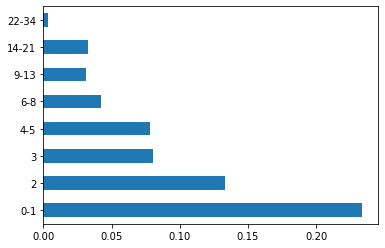

In [ ]:
df = dataframe["tiempo_en_el_puesto_actual"].copy()
df = df.groupby(
    pd.cut(
        df.values,
        [0, 1, 2, 3, 5, 8, 13, 21, 34],
        labels=["0-1", "2", "3", "4-5", "6-8", "9-13", "14-21", "22-34"],
    )
).count() / len(df)

df.plot.barh()
charts["experience_years_in_position"] = to_rechart(df.sort_index())

#### 2.1.4. Educación

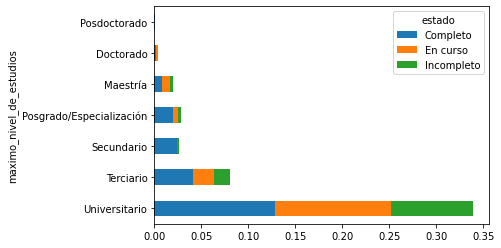

In [ ]:
df = dataframe.groupby(["maximo_nivel_de_estudios", "estado"])[
    "maximo_nivel_de_estudios"
].count().unstack("estado").fillna(0).sort_values(
    by=["Completo"], ascending=False
) / len(
    dataframe
)

df.plot(kind="barh", stacked=True, logx=False)
charts["education_stacked"] = to_rechart(df)

24.07

Index(['Ingeniería en Sistemas de Información', 'Ingeniería en Informática',
       'Analista de Sistemas', 'Licenciatura en Sistemas de Información',
       'Licenciatura en Ciencias de la Computación',
       'Licenciatura en Informática', 'Tecnicatura en Programación',
       'Ingeniería Electrónica', 'Tecnicatura Superior en Programación',
       'Ingeniería en Computación',
       'Licenciatura en Administración de Empresas', 'Diseño Gráfico',
       'Licenciatura en Análisis de Sistemas',
       'Tecnicatura Superior en Sistemas Informáticos',
       'Tecnicatura en Informática', 'Ingeniería Industrial',
       'Diseño Multimedial', 'Tecnicatura en Sistemas',
       'Analista Programador Universitario',
       'Tecnicatura Superior en Análisis de Sistemas',
       'Licenciatura en Psicología', 'Ingeniería en Telecomunicaciones',
       'Analista Universitario de Sistemas', 'Analista Programador',
       'Telecomunicaciones', 'Tecnicatura Electrónica'],
      dtype='object')

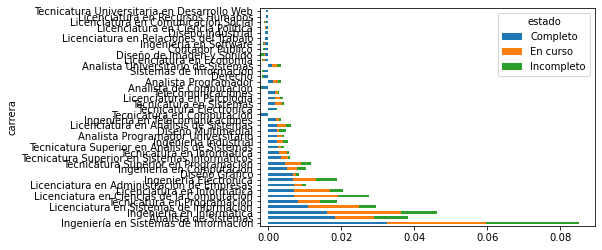

In [ ]:
# Para el grado de completitud por carrera se tendrá en cuenta el tamaño de la muestra, se considerarán insuficientes los datos de aquellas carreras que representen menos del 0.5% del total

df = (
    dataframe["carrera"]
    .value_counts(normalize=True, sort=True)
    .to_frame()
    .query("carrera > 0.005")
)

display(len(dataframe["carrera"]) * 0.005)
chosen_careers = df.index
display(chosen_careers)

df = dataframe.query('carrera != "DELETEME"')["carrera"].value_counts(
    normalize=True, sort=True
)
charts["careeres_percent"] = to_rechart(df, 40)

df = dataframe.query('carrera != "DELETEME"').groupby(["carrera", "estado"])[
    "carrera"
].count().unstack("estado").fillna(0).sort_values(
    by=["Completo", "En curso"], ascending=False
) / len(
    dataframe
)

df.loc[
    df.eval("carrera not in @chosen_careers"), ["Completo", "En curso", "Incompleto"]
] *= -1

df[:40].plot(kind="barh", stacked=True, logx=False)
charts["careeres_stacked_percent"] = to_rechart(df[:40])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


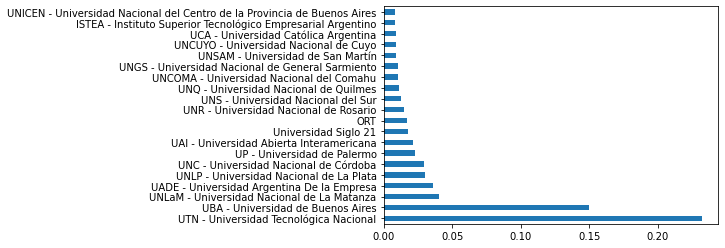

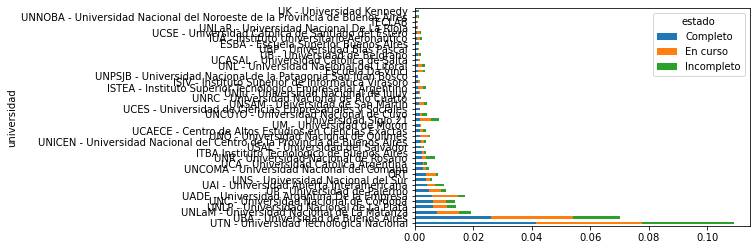

In [ ]:
df = dataframe.query('universidad != "DELETEME"')["universidad"].value_counts(
    normalize=True, sort=True
)

df[:20].plot(kind="barh")
charts["universities_percent"] = to_rechart(df, 40)

df = dataframe.query('universidad != "DELETEME"').groupby(["universidad", "estado"])[
    "universidad"
].count().unstack("estado").fillna(0).sort_values(
    by=["Completo", "En curso"], ascending=False
) / len(
    dataframe
)

df[:40].plot(kind="barh", stacked=True, logx=False)
charts["universities_stacked_percent"] = to_rechart(df, 40)

In [ ]:
"""dc = pd.DataFrame(
    {
        "realizaste_cursos_de_especializacion": dataframe[
            "realizaste_cursos_de_especializacion"
        ].dropna()
    }
)
dc

mask = dc["realizaste_cursos_de_especializacion"].str.contains("Sí")
dc.loc[mask, "hizo_curso"] = "Sí"
dc.loc[~mask, "hizo_curso"] = "No"

df = dc["hizo_curso"].value_counts(normalize=True, sort=True)

df.plot(kind="barh")
charts["specialization_percent"] = to_rechart(df)"""

'dc = pd.DataFrame(\n    {\n        "realizaste_cursos_de_especializacion": dataframe[\n            "realizaste_cursos_de_especializacion"\n        ].dropna()\n    }\n)\ndc\n\nmask = dc["realizaste_cursos_de_especializacion"].str.contains("Sí")\ndc.loc[mask, "hizo_curso"] = "Sí"\ndc.loc[~mask, "hizo_curso"] = "No"\n\ndf = dc["hizo_curso"].value_counts(normalize=True, sort=True)\n\ndf.plot(kind="barh")\ncharts["specialization_percent"] = to_rechart(df)'

In [ ]:
"""
mask_empleador = dc["realizaste_cursos_de_especializacion"].str.contains("un empleador")
mask_particular = dc["realizaste_cursos_de_especializacion"].str.contains(
    "de forma particular"
)

dc.loc[mask_particular, "quien_paga"] = "Solo particular"
dc.loc[mask_empleador, "quien_paga"] = "Solo empleador"
dc.loc[mask_empleador & mask_particular, "quien_paga"] = "Empleador y particular"

df = dc["quien_paga"].value_counts(normalize=True, sort=True)

df.plot(kind="barh")
charts["specialization_pays_percent"] = to_rechart(df)"""

'\nmask_empleador = dc["realizaste_cursos_de_especializacion"].str.contains("un empleador")\nmask_particular = dc["realizaste_cursos_de_especializacion"].str.contains(\n    "de forma particular"\n)\n\ndc.loc[mask_particular, "quien_paga"] = "Solo particular"\ndc.loc[mask_empleador, "quien_paga"] = "Solo empleador"\ndc.loc[mask_empleador & mask_particular, "quien_paga"] = "Empleador y particular"\n\ndf = dc["quien_paga"].value_counts(normalize=True, sort=True)\n\ndf.plot(kind="barh")\ncharts["specialization_pays_percent"] = to_rechart(df)'

#### 2.1.5. Demografía

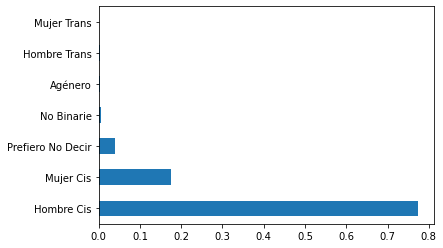

In [ ]:
df = dataframe["me_id_extra"].value_counts(normalize=True, sort=True)

df.plot(kind="barh")
charts["demographics_gender_percent"] = to_rechart(df)

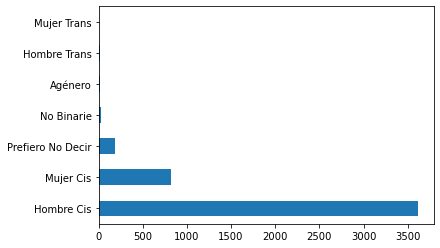

In [ ]:
df = dataframe["me_id_extra"].value_counts(normalize=False, sort=True)

df.plot(kind="barh")
charts["demographics_gender_absolute"] = to_rechart(df)

In [ ]:
id_sexual_df = pd.read_csv("https://raw.githubusercontent.com/openqube/openqube-sueldos/master/data/Orientacion%20sexual%202021.02.csv")

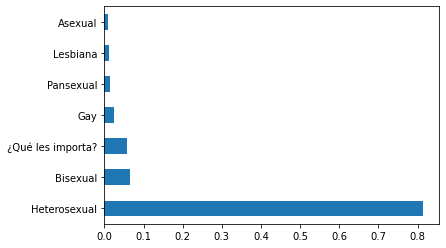

In [ ]:
df = id_sexual_df["Identidad sexual"].value_counts(normalize=True, sort=True)

df[:7].plot(kind="barh")
charts["demographics_sexual_orientation_percent"] = to_rechart(df, 7)

In [ ]:
"""
df = dataframe["sufriste_o_presenciaste_situaciones_de_violencia_laboral"].value_counts(normalize=True, sort=True)

demographics_laboral_violence_ever = df['En un trabajo anterior'] + df['En mi trabajo actual']
demographics_laboral_violence_ever = pd.Series(demographics_laboral_violence_ever)

df.plot(kind="barh")
charts["demographics_laboral_violence"] = to_rechart(df)
charts["demographics_laboral_violence_ever"] = to_rechart(demographics_laboral_violence_ever)

'demographics_laboral_violence'"""

'\ndf = dataframe["sufriste_o_presenciaste_situaciones_de_violencia_laboral"].value_counts(normalize=True, sort=True)\n\ndemographics_laboral_violence_ever = df[\'En un trabajo anterior\'] + df[\'En mi trabajo actual\']\ndemographics_laboral_violence_ever = pd.Series(demographics_laboral_violence_ever)\n\ndf.plot(kind="barh")\ncharts["demographics_laboral_violence"] = to_rechart(df)\ncharts["demographics_laboral_violence_ever"] = to_rechart(demographics_laboral_violence_ever)\n\n\'demographics_laboral_violence\''

2.1.7 Participaste de algún Bootcamp

En esta sección la idea es conocer cuántas personas realizaron bootcamps, al margen de obtener el dato de cuáles fueron los bootcamps más solicitados.

In [ ]:
dataframe['participaste_de_algun_boot_camp']

AttributeError: 'Series' object has no attribute 'info'

En primer lugar, se realizar un reemplazo de valores referidos globalmente a la respuesta 'NO', luego se procede a hacer lo mismo para el caso afirmativo.

In [ ]:
dataframe["participaste_de_algun_boot_camp"] = dataframe["participaste_de_algun_boot_camp"].replace(['no','no ', 'No', 'No.', 'No ','NO ', '¨no','no participé', 'No participé.',
          'No, me parecen un engaño','No, pero me gustaria', '-'], 'NO')

<ipython-input-1276-dd111d85698c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["participaste_de_algun_boot_camp"] = dataframe["participaste_de_algun_boot_camp"].replace(['no','no ', 'No', 'No.', 'No ','NO ', '¨no','no participé', 'No participé.',


In [ ]:
# Obtengo el total de valore Na o NaN (en este caso suceden porque dejan la pregunta sin contestar)
dataframe['participaste_de_algun_boot_camp'].isna().sum()

4192

In [ ]:
# Se normalizan los valores Na/NaN rellenándose con 'NO'
dataframe["participaste_de_algun_boot_camp"]=dataframe['participaste_de_algun_boot_camp'].fillna('NO')

<ipython-input-1278-cb4e1f2cf771>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["participaste_de_algun_boot_camp"]=dataframe['participaste_de_algun_boot_camp'].fillna('NO')


In [ ]:
# Se obtiene el recuento de valores únicos para cada caso.
dataframe['participaste_de_algun_boot_camp'].value_counts()

NO                   4476
Digital House          26
Henry                  18
Acamica                 9
Ada                     9
                     ... 
Coderhous               1
digital house           1
ITBA                    1
Courseit                1
Pin App y EpiData       1
Name: participaste_de_algun_boot_camp, Length: 196, dtype: int64

In [ ]:
dataframe["participaste_de_algun_boot_camp"].unique().tolist()

['NO',
 'Informatorio Chaco',
 'crowdar',
 'informatorio, codo a codo, digital house',
 'Alkemy',
 'Informatorio haco',
 'Coderhouse',
 'NAHUAL IT',
 'Acámica',
 'Bootcamp de UX UI DESIGN THINKING Y FIGMA',
 'Platzi',
 'Digitalhouse',
 'mindhub',
 'Globant',
 'IAE',
 'Digital House',
 'Plataforma 5',
 'Chainlink',
 'Data IQ',
 'UTN',
 'Udacity',
 'Microstrategy',
 'Egg educación ',
 'Acamica Digital House',
 'Sí, en uno de backend de MercadoLibre, pero no me gustó y me seguí dedicando al front',
 'Mercado Libre',
 'Acamica',
 'root linux, Instituto Tecnologico Argentino, SADIO, ',
 'Codigo Facilito',
 'ITBA',
 'OpenBootcamp',
 'python',
 'MindHub',
 'ekoparty',
 'acamica',
 'Courseit',
 'Codo a Codo',
 'Educacion IT',
 'Terratec Argentina - Córdoba Capital',
 'Digital House ',
 'CourseIt',
 'ComIT',
 'Henry ',
 'Henry',
 'HENRY',
 'De varios. No recuerdo nombre de la institución pero fue hace tiempo ',
 'Si',
 'Soy HEnry',
 'Alkemy y Codo a Codo',
 'Educacion Egg',
 'Algun que otro onl

In [ ]:
bootcamp_si = dataframe.loc[dataframe["participaste_de_algun_boot_camp"] != "NO", "participaste_de_algun_boot_camp"] = "SI"

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


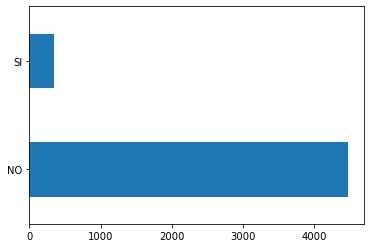

In [ ]:
df = dataframe["participaste_de_algun_boot_camp"].value_counts(sort=True)

df[:10].plot.barh()
charts["bootcamp_percent"] = to_rechart(df, 10)


In [ ]:
# Se pretende normalizar la columna con los nombres de Bootcamps. Por cuestiones poco conocimiento de regex queda pendiente análisis de cuáles son los bootcamps más elegidos. 
dataframe = normalize_dataframe_column(
    dataframe,
    "participaste_de_algun_boot_camp",
    {
 
 '(Informatorio Chaco|Informatorio haco)' : 'Informatorio Chaco',
 '(Crowdar Academy|crowdar)' : 'Crowdar',
 'NO' : 'NO',
 'informatorio, codo a codo, digital house': ['Informatorio', 'Codo a codo', 'Digital House'],
 'Alkemy' : 'Alkemy',
 '( Coderhouse|Cursos en Coderhouse|coderhouse|CoderHouse. Gba|Coderhouse |CoderHouse|Coderhous|Coderhouse|Varios en coderhouse)': 'Coderhouse',
 'NAHUAL IT' : 'Nahual IT',
 '(Acámica|Acamica|acamica)' : 'Acámica',
 'Bootcamp de UX UI DESIGN THINKING Y FIGMA' : 'Bootcamp UX',
 'Platzi' : 'Platzi',
 '(DigitalHouse|digital house|Digital house |Digital house|Digitalhouse|Digital House|Digital House )' : 'Digital House',
 '(Mind Hub|mindhub|Mindhub)' : 'Mindhub',
 '(Design Center - Globant|Globant |Globant)' : 'Globant',
 'IAE' : 'IAE',
 '(Si, Plataforma 5|Plataforma5|Plataforma 5)' : 'Plataforma 5',
 'Chainlink' : 'Chainlink',
 'Data IQ' : 'Data IQ',
 '(UTN e-learning|UTN)' : 'UTN',
 'Udacity' : 'Udacity',
 'Microstrategy' : 'Microstrategy',
 '(Egg Education|Egg Education |Egg|Egg coperacion|EGG|Egg educación |Educacion Egg)' : 'Egg Educación',
 'Acamica Digital House' : ['Acámica', 'Digital House'],
 'Sí, en uno de backend de MercadoLibre, pero no me gustó y me seguí dedicando al front' : 'Mercado Libre',
 '(Mercadolibre |Mercadolibre|meli|Mercado Libre)' : 'Mercado Libre',
 'root linux, Instituto Tecnologico Argentino, SADIO, ' : ['Root Linux', 'Instituto Tecnologico Argentino','SADIO'],
 'Codigo Facilito' : 'Código Facilito',
 'ITBA' : 'ITBA',
 '(Openbootcamp|OpenBootcamp)' : 'OpenBootCamp',
 'python' : 'Python',
 'ekoparty' : 'Ekoparty',
 '(CourseIt|Courseit|CourseIT)' : 'CourseIT',
 '(Programa codo a codo 4.0|Codo a codo|Codo a codo |Codo a Codo)' : 'Codo a codo',
 '(EducaciónIT|EducacionIT|Educación IT|Educacion IT)' : 'Educación IT',
 'Terratec Argentina - Córdoba Capital' : 'Terratec Argentina',
 'ComIT' : 'Comunidad IT',
 '(Soy Henry|Henry |Henry|HENRY|Soy HEnry|Soy henry|soyHenry)' : 'Henry',
 'De varios. No recuerdo nombre de la institución pero fue hace tiempo ' : 'Otros',
 '(Si|si)' : 'DELETEME',
 'Alkemy y Codo a Codo' : ['Alkemy', 'Codo a codo'],
 'Algun que otro online (Scrimba, Frontendopen)' : 'Otros',
 'UNC ' : 'UNC',
 '(Escuela DevRock|escuela devrock|Escuela dev rock)' : 'Escuela DevRock',
 'ChainLink' : 'ChainLink',
 'Accenture' : 'Accenture',
 'Rolling Code School / CoderHouse' : ['Rolling Code School', 'Coderhouse'],
 'Comunidad it' : 'Comunidad IT',
 'Oracle One next education and Alura ' : 'Otros',
 'Si, NTT DATA' : 'NTT Data',
 '(Lagash |Lagash University)' : 'Lagash University',
 'Undefined School' : 'Otros',
 '(r/argentina programa|argentina programa)' : 'Argentina Programa',
 'Baufest': 'Baufest',
 'CISCO' : 'CISCO',
 'Arpac-IT' : 'Arpac IT',
 'ICFFAA - Instituto de Ciberdefensa de las Fuerzas Armadas' : 'Otros',
 'Uala' : 'Ualá',
 '(ada|ADA ITW|Ada|ADA|ADA IT|si, ADA IT|AdaITW|Ada ITW' : 'ADA',
 'Si, Salesforce del gob de la ciudad' : 'Otros',
 'Rooftop Academy' : 'Otros',
 'IFTS ' : 'Otros',
 'Digital house, Educación IT' : ['Digital House', 'Educación IT'],
 'comunidades UX' : 'Otros',
 'Junior Achivement' : 'Otros',
 'Despegar.com' : 'Otros',
 'Codo a codo, AWS Re/Start, IBM, KPMG, ' : ['Codo a codo', 'AWS', 'IBM', 'KPMG'],
 'Acamica, codo a codo' : ['Acámica', 'Codo a codo'],
 'La segunda seguros, Neoris lab' : 'Otros',
 '(Comunidad Mujeres en Tecnología|Met - mujeres en tecnología |Si, MeT)' : 'Mujeres en Tecnología',
 'Si, ADA y Coderhouse. ' : ['ADA', 'Coderhouse'],
 'Era un "Academy" de DevOps en Globant' : 'Globant',
 'Forge/coding dojo' : 'Otros',
 'Service Design Club, Platzi': ['Otros', 'Platzi'],
 '(Free Code Camp|Freecodecamp )' : 'freeCodeCamp',
 'Blackberry aws' : 'AWS',
 'DigitalHouse - Mercadolibre' : ['Digital House', 'Mercado Libre'],
 'Digital house, pinapp' : ['Digital House', 'Otros'],
 'Rooftop' : 'Otros',
 'Google' : 'Google',
 'Plan 111mil' : 'Otros',
 'Anyone Ai' : 'Otros',
 'Ada ITW y digital house' : ['ADA', 'Digital House'],
 'Couseit, codo a codo ' : ['Course IT', 'Codo a codo'],
 'Alkemy y No Country (muy recomendables)': ['Alkemy', 'No Country'],
 'Quales Group' : 'Otros',
 'Pin App y EpiData' : 'Otros',
 'Devlights' : 'Otros',
 'Solvd' : 'Otros',
 'Trama' : 'Otros',
 'Digit@talers(2021)- EducacionIT-Telecom' : ['Otros', 'Educación IT', 'Telecom'],
 'NEORIS y UTN BA' : ['Otros', 'UTN'],
 'Universidad Nacional de Tucumán' : 'Universidad Nacional Tucumán',
 'Proydesa' : 'Otros',
 'Openbootcamp y labs XD' : 'OpenBootCamp',
 'CoderHouse y Codo a Codo' : ['Coderhouse', 'Codo a codo'],
 'EGG / Codo a Codo' : ['Egg Educación', 'Codo a codo'],
 'IIEE' : 'Otros',
 'Egg cooperation- Polotic Misiones' : ['Egg Educación', 'Otros'],
 'Coconuts, Silicon Misiones con Datalytics' : ['Otros', 'Datalytics'],
 'Coderhouse y Alkemy' : ['Coderhouse', 'Alkemy'],
 'AWS Rocket Journey' : 'AWS',
 'HackIT-BA' : 'Otros',
 'Mentor en Coderhood' : 'Otros',
 'comunidad IT' : 'Comunidad IT',
 'Educacion IT y Coderhouse' : ['Educación IT', 'Coderhouse'],
 'Egg y Eduacion IT' : ['Egg Educación', 'Educación IT'],
 'Service Design Club' : 'Otros',
 'Sabio ' : 'Otros',
 'GlobalLogic' : 'GlobaLogic',
 'Accenture, mercadolibre' : ['Accenture', 'Mercado Libre'],
 'V_Camp (Valtech)' : 'Valtech',
 'comunidad it' : 'Otros',
 'Nucba' : 'Otros',
 'Acamica - UTN' : ['Acámica', 'UTN'],
 'Codo a codo, Digit@lers' : ['Codo a codo', 'Otros'],
 'si.' : 'DELETEME',
 'Digit@lers' : 'Otros',
 'Universidad Torcuato Di Tella' : 'UTDT',
 'TecLab' : 'Otros',
 'Folcamp' : 'Otros',
 'San Juan TEC' : 'Otros',
 'Neoris' : 'Otros',
 'ASJ Servicios' : 'Otros',
 'Comunidad IT' : 'Comunidad IT',
 'UTN CISSP- Hackademy (Ekoparty)' : ['UTN', 'Ekoparty'],
 'Mercado Libre / Digital House' : ['Mercado Libre', 'Digital House'],
 'Accenture, Comunidad IT' : ['Accenture', 'Comunidad IT'],
 'Arbusta' : 'Arbusta',
 'Collaborative SRL' : 'Otros',
 'rolling code school' : 'Otros',
 'Fundacion Leon' : 'Otros',
 'LabsXD' : 'Otros',
    },
)

df = dataframe["participaste_de_algun_boot_camp"].value_counts(sort=True)
display(df[:60])

ValueError: Must have equal len keys and value when setting with an iterable

Relación entre el tipo de posición que tienen quienes participaron de algún bootcamp.

In [1]:
dataframe.loc[dataframe["participaste_de_algun_boot_camp"]!="NO", "trabajo_de"].value_counts()

NameError: ignored

In [ ]:
# Gráfico de barras horizontales sobre las primeras 10 posiciones.
dataframe.loc[dataframe["participaste_de_algun_boot_camp"]!="NO", "trabajo_de"].value_counts().head(10).plot(
    kind="barh", figsize=(12,6), fontsize=12)
plt.title("De qué trabajan los que participaron de algún bootcamp")
plt.legend

### 2.2. Salarios

#### 2.2.1. Progresión Histórica

https://colab.research.google.com/drive/10e5hZytlMatMuKmLCRo9YzpS1O9EbeV2#scrollTo=Pc5mUvyozCQ5

#### 2.2.2. Región

In [ ]:
# Para el análisis regional se tendrá en cuenta el tamaño de la muestra, se marcarán como insuficientes los datos de aquellas regiones que representen menos del 0.5% del total

df = (
    dataframe["donde_estas_trabajando"]
    .value_counts(normalize=True, sort=True)
    .to_frame()
    .query("donde_estas_trabajando > 0.005")
)

display(len(dataframe["donde_estas_trabajando"]) * 0.005)
chosen_regions = df.index
display(chosen_regions)

24.07

Index(['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Córdoba',
       'Santa Fe', 'Mendoza', 'Entre Ríos', 'Chaco', 'Salta', 'Río Negro',
       'Misiones', 'Neuquén', 'Tucumán', 'Corrientes', 'Jujuy', 'San Juan'],
      dtype='object')

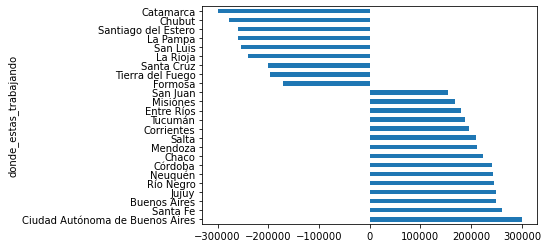

In [ ]:
# Éstas serán convertidas a valores negativos, de manera de poder distinguirlas sin perjudicar a quienes deseen
# observar los resultados más allá del tamaño muestral acotado

df = dataframe.copy()

df.loc[
    df.eval("donde_estas_trabajando not in @chosen_regions"),
    "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local",
] *= -1
df = (
    df.groupby(["donde_estas_trabajando"])
    .median()
    .unstack()["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .sort_values(ascending=False)
)

df.plot(kind="barh")
charts["regions_salary_median"] = to_rechart(df)

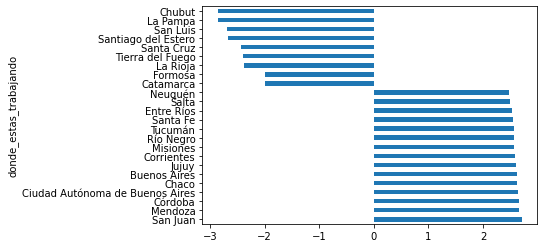

In [ ]:
df = dataframe.copy()
df.loc[
    df.eval("donde_estas_trabajando not in @chosen_regions"),
    "que_tan_conforme_estas_con_tus_ingresos_laborales",
] *= -1
df = (
    df.groupby(["donde_estas_trabajando"])
    .mean()
    .unstack()["que_tan_conforme_estas_con_tus_ingresos_laborales"]
    .sort_values(ascending=False)
)

df.plot(kind="barh")
charts["regions_salary_acquiescence"] = to_rechart(df)

In [ ]:
# De qué fue el ajuste total acumulado. Limpieza
dataframe['de_que_fue_el_ajuste_total_acumulado'].unique().tolist()

['0',
 '20',
 '54',
 '15',
 '25',
 '3',
 '5',
 '18',
 '30',
 '27%',
 '14%',
 '7',
 '23',
 '8',
 '13',
 '37',
 '90',
 '38',
 '45',
 '50',
 '17',
 '59',
 '14',
 '1%',
 '16%',
 '12%',
 '47',
 'Dolarizado',
 '70',
 '33',
 '10',
 '35',
 '45%',
 '35%',
 '27',
 '49',
 '110',
 '40',
 '25%',
 '51',
 '32',
 '30%',
 '65',
 '20%',
 '60',
 '80%',
 '95',
 '500',
 '12',
 'No se',
 '5%',
 '11',
 '34',
 '58',
 '57',
 '100',
 '22% por perfo + IPC todos los meses',
 '50%',
 '60%',
 '66',
 '9',
 '10%',
 '44',
 'Atado a la inflacion',
 '25,92',
 '26',
 '100%',
 '23%',
 '48',
 '29',
 '15%',
 '31',
 '24.5',
 '52',
 '21',
 '11%',
 '26.5',
 '80',
 '55',
 '53',
 '17.5',
 '40%',
 '24',
 '16',
 '46',
 '19',
 '82',
 '67',
 '40% aprox',
 '36',
 '17%',
 '3%',
 '6',
 '42',
 '62',
 '4',
 '200%',
 '39,15',
 '22.5',
 '6%',
 '8%',
 '22',
 '227%',
 '28',
 'no lo se, atado al dolar.',
 '41',
 '63',
 '39',
 '55%',
 '4.3',
 '92',
 'no me acuerdo',
 '87.4',
 '41%',
 '52%',
 '56%',
 '200',
 '32%',
 '43.75%',
 '94',
 'Atado a I

In [ ]:
df = dataframe.copy()
df.loc[
    df.eval("donde_estas_trabajando not in @chosen_regions"),
    "de_que_fue_el_ajuste_total_acumulado",
] *= -1
df = (
    df.groupby(["donde_estas_trabajando"])
    .median()
    .unstack()["de_que_fue_el_ajuste_total_acumulado"]
    .sort_values(ascending=False)
    / 100
)

df.plot(kind="barh")
charts["regions_salary_adjustment"] = to_rechart(df)

KeyError: 'de_que_fue_el_ajuste_total_acumulado'

##### 2.2.2.1. Región (mínimos por seniority) - no incluídos en el reporte

In [ ]:
df = (
    dataframe.query("donde_estas_trabajando in @chosen_regions")
    .groupby(["donde_estas_trabajando", "seniority"])[
        "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"
    ]
    .min()
    .unstack()
    .sort_values(by=["Senior"], ascending=False)
)
display(df)

seniority,Junior,Semi-Senior,Senior
donde_estas_trabajando,,,
Misiones,62300.0,75000.0,116445.0
Río Negro,73800.0,133597.0,110000.0
Jujuy,100000.0,145000.0,100000.0
Entre Ríos,40000.0,96000.0,98463.0
San Juan,68000.0,160000.0,98000.0
Santa Fe,45000.0,95000.0,96000.0
Tucumán,60000.0,97000.0,84000.0
Salta,100000.0,80000.0,80000.0
Neuquén,30000.0,90000.0,78850.0




```
# This is formatted as code
```

##### 2.2.2.2. Región (máximos por seniority) - no incluídos en el reporte

In [ ]:
df = (
    dataframe.query("donde_estas_trabajando in @chosen_regions")
    .groupby(["donde_estas_trabajando", "seniority"])[
        "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"
    ]
    .max()
    .unstack()
    .sort_values(by=["Senior"], ascending=False)
)
display(df)

seniority,Junior,Semi-Senior,Senior
donde_estas_trabajando,,,
Buenos Aires,800000.0,1467000.0,1475000.0
Ciudad Autónoma de Buenos Aires,1329000.0,1450000.0,1425000.0
Santa Fe,1412982.0,1327000.0,1414805.0
Chaco,900000.0,380000.0,1400000.0
Córdoba,1180000.0,1400000.0,1400000.0
Neuquén,250000.0,320000.0,1253750.0
Jujuy,248000.0,480000.0,1200000.0
Mendoza,600000.0,1344000.0,1200000.0
Río Negro,322000.0,840000.0,1160000.0


#### 2.2.3. Puesto

##### 2.2.3.1. Seniority

(metodología vieja, queda sólo para reproducir reportes previos)

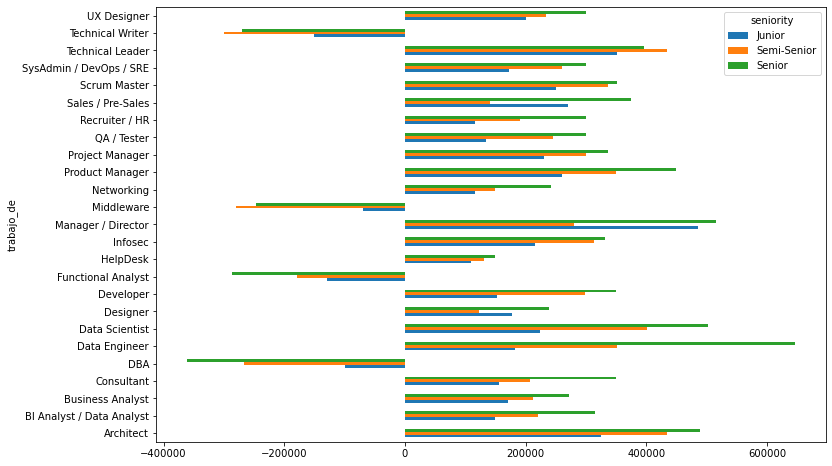

In [ ]:
# Para este análisis se tendrá en cuenta el tamaño de la muestra, se marcarán como insuficientes los datos de aquellas que representen menos del 0.5% del total

df = (
    dataframe["trabajo_de"]
    .value_counts(normalize=True, sort=True)
    .to_frame()
    .query("trabajo_de > 0.005")
)

chosen_roles = list(df.index)
excluded_roles = {
    "VP / C-Level"
}  # Excluído porque no contaba con todas las seniorities

df = dataframe["trabajo_de"].value_counts(normalize=True, sort=True)
candidate_roles = list(df[:26].index)
top_roles = [r for r in candidate_roles if r not in excluded_roles]

df = (
    dataframe.query("trabajo_de in @top_roles")
    .groupby(["trabajo_de", "seniority"])
    .median()
    .unstack("seniority")["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .fillna(0)
)  # .sort_values(by=['salario_mensual_bruto_en_tu_moneda_local'], ascending=False)

df.loc[
    df.eval("trabajo_de not in @chosen_roles"), ["Junior", "Semi-Senior", "Senior"]
] *= -1

plt.figure(figsize=(12, 8))
df.plot(kind="barh", ax=plt.gca())
charts["roles_seniority_salary_median"] = to_rechart(df[:30])

##### 2.2.3.1. Seniority

La metodología previa consideraba a una `position` con "suficientes datos" si la sumatoria de todas sus seniorities (junior, senior, semisr) contenía al menos un 0.5% del total de las respuestas.

La nueva metodología considera cada combinación (`position`, `seniority`) con suficientes datos si hay al menos 6 valores para obtener la mediana.

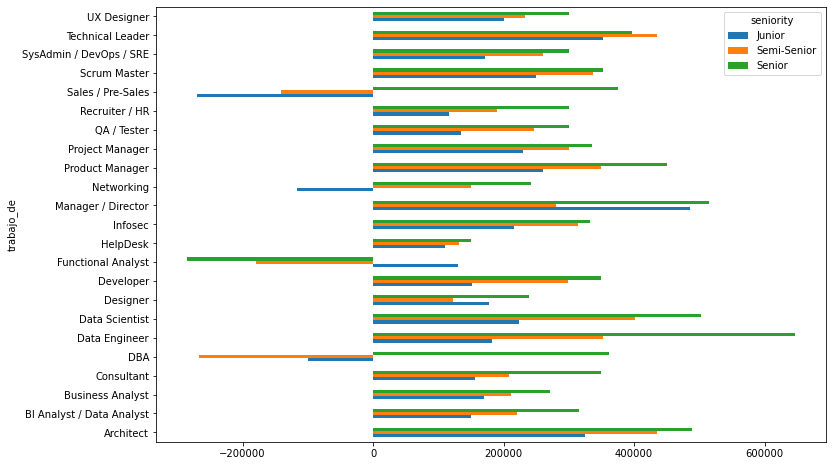

In [ ]:
salary_df = dataframe.copy()[dataframe.seniority.notna()]
salary_df['position_and_seniority'] = salary_df[["trabajo_de", "seniority"]].agg('__'.join, axis=1)

df = (
    (salary_df.position_and_seniority.value_counts(sort=True).to_frame())
    .query("position_and_seniority > 5")
)
top_positions = df.index
candidate_roles = [position.split("__")[0] for position in top_positions]
excluded_roles = {
    "VP / C-Level"
}  # Excluído porque no contaba con todas las seniorities
top_roles = [r for r in candidate_roles if r not in excluded_roles]

df = (
    salary_df.query("trabajo_de in @top_roles")
    .groupby(["trabajo_de", "seniority"])
    .median()
    .unstack("seniority")["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .fillna(0)
)

# invert positions and seniorities that have insufficient data.
df *= -1
for pos in top_positions:
    role = pos.split("__")[0]
    if role in excluded_roles:
        continue
    srty = pos.split("__")[1]
    
    df.loc[role][srty] *= -1

plt.figure(figsize=(12, 8))
df.plot(kind="barh", ax=plt.gca())
charts["roles_seniority_salary_median"] = to_rechart(df[:30])

In [ ]:
df

seniority,Junior,Semi-Senior,Senior
trabajo_de,,,
Architect,325000.0,435000.0,488500.0
BI Analyst / Data Analyst,150000.0,220744.0,315000.0
Business Analyst,170650.0,212000.0,271500.0
Consultant,156664.5,207500.0,350000.0
DBA,-100000.0,-267500.0,362000.0
Data Engineer,181793.0,352000.0,647000.0
Data Scientist,224000.0,402000.0,502000.0
Designer,178000.0,122000.0,239000.0
Developer,151800.0,298076.0,350000.0


##### 2.2.3.1. Industria

In [ ]:
# Para este análisis se tendrá en cuenta el tamaño de la muestra, se marcarán como insuficientes los datos de aquellas que representen menos del 0.5% del total
df = (
    dataframe["trabajo_de"]
    .value_counts(normalize=True, sort=True)
    .to_frame()
    .query("trabajo_de > 0.005")
)

display(len(dataframe["trabajo_de"]) * 0.005)
chosen_roles = df.index
display(chosen_roles)


df = dataframe["trabajo_de"].value_counts(normalize=True, sort=True)
top_roles = df[:26].index

df = (
    dataframe.query("trabajo_de in @top_roles")
    .groupby(["trabajo_de", "actividad_principal"])
    .median()
    .unstack("actividad_principal")["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .fillna(0)
)  # .sort_values(by=['salario_mensual_bruto_en_tu_moneda_local'], ascending=False)

df.loc[
    df.eval("trabajo_de not in @chosen_roles"),
    [
        "Otras industrias",
        "Producto basado en Software",
        "Servicios / Consultoría de Software / Digital",
    ],
] *= -1

df.plot(kind="barh")
charts["roles_actividad_principal_salary_median"] = to_rechart(df[:30])

24.07

Index(['Developer', 'SysAdmin / DevOps / SRE', 'Technical Leader',
       'QA / Tester', 'Manager / Director', 'BI Analyst / Data Analyst',
       'Project Manager', 'Data Engineer', 'HelpDesk', 'Architect',
       'UX Designer', 'Data Scientist', 'Consultant', 'Business Analyst',
       'Infosec', 'Product Manager', 'Recruiter / HR', 'Networking',
       'Scrum Master', 'Sales / Pre-Sales', 'Designer'],
      dtype='object')

KeyError: 'actividad_principal'

In [ ]:
df.head()

Developer                  0.405899
SysAdmin / DevOps / SRE    0.100748
Technical Leader           0.065642
QA / Tester                0.052140
Manager / Director         0.034690
Name: trabajo_de, dtype: float64

##### 2.2.3.3. Seniority e Industria

In [ ]:
df = (
    dataframe.groupby(["actividad_principal", "seniority"])
    .median()
    .unstack("seniority")["salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
)  # .sort_values(by=[''],ascending=False)

df.plot.barh()
charts["actividad_principal_seniority_salary_median"] = to_rechart(df)

KeyError: 'actividad_principal'

##### 2.2.3.2. Open source / hobbie

In [ ]:
df = (
    dataframe.groupby(["contribuis_a_proyectos_open_source"])
    .median()
    .unstack()["salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .sort_values(ascending=False)
)

df.plot(kind="barh")
charts["opensource_salary_median"] = to_rechart(df)

KeyError: 'contribuis_a_proyectos_open_source'

In [ ]:
df = (
    dataframe.groupby(["programas_como_hobbie"])
    .median()
    .unstack()["salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .sort_values(ascending=False)
)

df.plot.barh()
charts["hobbie_salary_median"] = to_rechart(df)

KeyError: 'programas_como_hobbie'

#### 2.2.4. Carrera

In [ ]:
df = dataframe.groupby(["carrera", "estado"])["carrera"].count().unstack(
    "estado"
).fillna(0).sort_values(by=["Completo", "En curso"], ascending=False) / len(dataframe)

top_careers = df[:30].index

# Para este análisis se tendrá en cuenta el tamaño de la muestra, se marcarán como insuficientes los datos de aquellas que representen menos del 0.5% del total
df = df[:30]["Completo"].to_frame().query("Completo > 0.005")
display(df)
chosen_careers = df.index

,Completo
carrera,
Ingeniería en Sistemas de Información,0.032613
Analista de Sistemas,0.018280
Ingeniería en Informática,0.015995
Licenciatura en Sistemas de Información,0.010802
Tecnicatura en Programación,0.008101
Licenciatura en Ciencias de la Computación,0.007063
Licenciatura en Informática,0.007063
Licenciatura en Administración de Empresas,0.007063
Ingeniería Electrónica,0.006855


##### 2.2.4.1. Según Seniority

In [ ]:
df = dataframe.query('estado == "Completo"').copy()
df = invert_non_representative_values(df, "carrera", chosen_careers)
df = filter_valid_top_values(df, "carrera", top_careers)
df = get_two_dimensional_median_with_outliers_filtered(
    df, ["carrera", "seniority"], "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"
)

df[:30].plot(kind="barh")
charts["carrera_seniority_salary_median"] = to_rechart(df[:30])


df = dataframe.query('estado == "En curso"').copy()
df = invert_non_representative_values(df, "carrera", chosen_careers)
df = filter_valid_top_values(df, "carrera", top_careers)
df = get_two_dimensional_median_with_outliers_filtered(
    df, ["carrera", "seniority"], "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"
)

df[:30].plot(kind="barh")
charts["carrera_seniority_salary_median_encurso"] = to_rechart(df[:30])

KeyError: 'salario_mensual_o_retiro_bruto_en_tu_moneda_local'

In [ ]:
# Cuántos Ingenieros Industriales hay en el resultado obtenido, ya que sobresale del resto
df = dataframe.query('carrera in ["Ingeniería en Sistemas de Información"] & estado == "Completo"')[
    ["seniority", "trabajo_de", "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
].sort_values(by=["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"], ascending=False)

display("Un {:.2f}%".format(len(df) / len(dataframe) * 100))
display(df)

'Un 3.26%'

,seniority,trabajo_de,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local
2888,Senior,Data Engineer,1400000.0
5164,Semi-Senior,Developer,1327000.0
2815,Senior,Developer,1300000.0
2926,Senior,SysAdmin / DevOps / SRE,1224000.0
747,Senior,Manager / Director,1200000.0
...,...,...,...
3052,Semi-Senior,Developer,108000.0
2988,Senior,Project Manager,100000.0
4782,Senior,BI Analyst / Data Analyst,80000.0
3211,Semi-Senior,Project Manager,70000.0


In [ ]:
df

,seniority,trabajo_de,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local
2888,Senior,Data Engineer,1400000.0
5164,Semi-Senior,Developer,1327000.0
2815,Senior,Developer,1300000.0
2926,Senior,SysAdmin / DevOps / SRE,1224000.0
747,Senior,Manager / Director,1200000.0
...,...,...,...
3052,Semi-Senior,Developer,108000.0
2988,Senior,Project Manager,100000.0
4782,Senior,BI Analyst / Data Analyst,80000.0
3211,Semi-Senior,Project Manager,70000.0


##### 2.2.4.2. Según Estado de la Carrera

In [ ]:
df = dataframe.copy()
df = invert_non_representative_values(df, "carrera", chosen_careers)
df = filter_valid_top_values(df, "carrera", top_careers)
df = get_two_dimensional_median_with_outliers_filtered(
    df, ["carrera", "estado"], "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"
)

df[:30].plot(kind="barh")
charts["carrera_estado_salary_median"] = to_rechart(df[:30])

KeyError: 'salario_mensual_o_retiro_bruto_en_tu_moneda_local'

##### 2.2.4.3. Según Nivel de Estudios Alcanzado

24.07

Index(['Universitario', 'Terciario', 'Posgrado/Especialización', 'Secundario',
       'Maestría', 'Doctorado'],
      dtype='object')

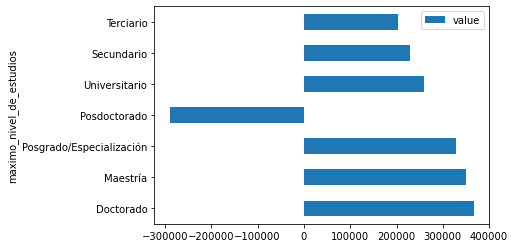

In [ ]:
# Para este análisis se tendrá en cuenta el tamaño de la muestra, se marcarán como insuficientes los datos de aquellas que representen menos del 0.5% del total
df = (
    dataframe["maximo_nivel_de_estudios"]
    .value_counts(normalize=True, sort=True)
    .to_frame()
    .query("maximo_nivel_de_estudios > 0.005")
)

display(len(dataframe["maximo_nivel_de_estudios"]) * 0.005)
chosen_levels = df.index
display(chosen_levels)

df = (
    dataframe.groupby(["maximo_nivel_de_estudios"])
    .median()
    .unstack()["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .sort_values(ascending=False)
    .to_frame("value")
)
df.loc[df.eval("maximo_nivel_de_estudios not in @chosen_levels"), "value"] *= -1

df.plot(kind="barh")
charts["nivel_estudios_salary_median"] = to_rechart(df)

##### 2.2.4.4. Según hicieron o no Cursos de Especialización

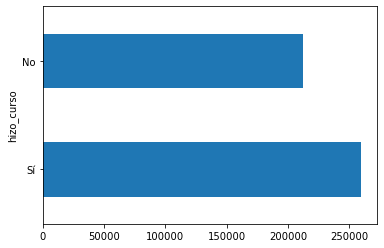

In [ ]:

dc = dataframe[
    [
        "participaste_de_algun_boot_camp",
        "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local",
    ]
].dropna()

mask = dc["participaste_de_algun_boot_camp"].str.contains("Sí")
dc.loc[mask, "hizo_curso"] = "Sí"
dc.loc[~mask, "hizo_curso"] = "No"

df = (
    dc.groupby(["hizo_curso"])
    .median()
    .unstack()["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .sort_values(ascending=False)
)

df.plot(kind="barh")

charts["hizo_curso_salary_median"] = to_rechart(df)

#### 2.2.5. Tecnología

##### 2.2.5.1. Según Plataformas

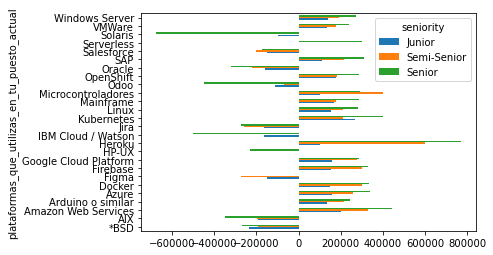

In [ ]:
# Para este análisis se tendrá en cuenta el tamaño de la muestra, se marcarán como insuficientes los datos de aquellas que representen menos del 0.5% del total
df = (
    dataframe["plataformas_que_utilizas_en_tu_puesto_actual"]
    .str.extractall(r"(?P<count>[^,]+),? ?")["count"]
    .value_counts(normalize=True, sort=True)
)

top_platforms = df[:30].index
excluded_platforms = {"OpenStack"}  # Excluída para mantener escala
chosen_platforms = df.to_frame().query("count > 0.005").index

df = dataframe.copy()
df = (
    df["plataformas_que_utilizas_en_tu_puesto_actual"]
    .str.split(",")
    .apply(pd.Series)
    .merge(df, right_index=True, left_index=True)
    .drop(["plataformas_que_utilizas_en_tu_puesto_actual"], axis=1)
    .melt(
        id_vars=["seniority", "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"],
        value_name="plataformas_que_utilizas_en_tu_puesto_actual",
    )
    .drop(["variable"], axis=1)
    .dropna()
    .query("plataformas_que_utilizas_en_tu_puesto_actual in @top_platforms")
    .query("plataformas_que_utilizas_en_tu_puesto_actual not in @excluded_platforms")
    .groupby(["plataformas_que_utilizas_en_tu_puesto_actual", "seniority"])
    .median()
    .unstack("seniority")["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .fillna(0)
)

df.loc[
    df.eval("plataformas_que_utilizas_en_tu_puesto_actual not in @chosen_platforms"), ["Junior", "Semi-Senior", "Senior"]
] *= -1

df = df[df.index != "Ninguna de las anteriores"]

df[:30].plot(kind="barh")
charts["plataformas_seniority_salary_median"] = to_rechart(df[:30])

##### 2.2.5.2. Según Lenguajes de Programación

seniority,Junior,Semi-Senior,Senior
lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual,,,
.NET,150000.0,241232.5,362000.0
ABAP,-158000.0,-264000.0,-350000.0
Arduino,-320000.0,-190000.0,-180000.0
Bash/Shell,180000.0,280000.0,350000.0
C,130000.0,293332.5,379677.0
C#,125000.0,220000.0,280000.0
C++,150000.0,289000.0,309000.0
COBOL,-113500.0,-315000.0,-293000.0
CSS,158000.0,273980.5,346450.0


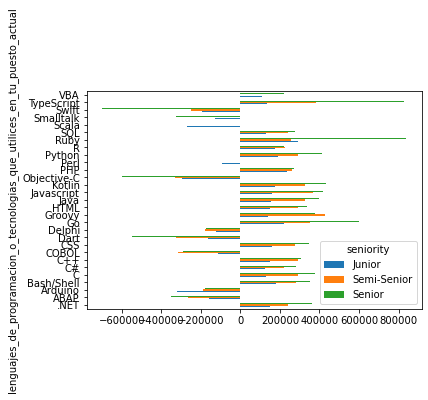

In [ ]:
#  Para este análisis se tendrá en cuenta el tamaño de la muestra, se marcarán como insuficientes los datos de aquellas que representen menos del 0.5% del total
df = (
    dataframe["lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual"]
    .str.extractall(r"(?P<count>[^,]+),? ?")["count"]
    .value_counts(normalize=True, sort=True)
)
top_languages = df[:30].index

chosen_languages = df.to_frame().query("count > 0.005").index

df = dataframe.copy()
df = (
    df["lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual"]
    .str.split(",")
    .apply(pd.Series)
    .merge(df, right_index=True, left_index=True)
    .drop(["lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual"], axis=1)
    .melt(
        id_vars=["seniority", "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"],
        value_name="lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual",
    )
    .drop(["variable"], axis=1)
    .dropna()
    .query("lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual in @top_languages")
    .groupby(["lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual", "seniority"])
    .median()
    .unstack("seniority")["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .fillna(0)
)

df.loc[
    df.eval("lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual not in @chosen_languages"),
    ["Junior", "Semi-Senior", "Senior"],
] *= -1

df = df[df.index != "Ninguno de los anteriores"]

display(df)
df.plot(kind="barh")
charts["lenguajes_de_programacion_seniority_salary_median"] = to_rechart(df[:30])

##### 2.2.6. Otras compensaciones

0    0.442459
dtype: float64

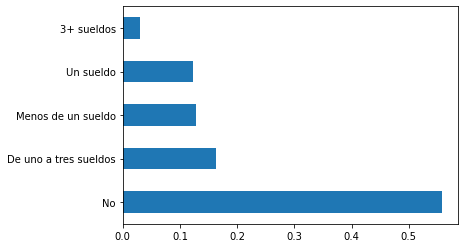

In [ ]:
df = (
    dataframe["recibis_algun_tipo_de_bono"]
    .value_counts(normalize=True, sort=True)
)

recibe_algun_tipo_de_bono = df['De uno a tres sueldos'] + df['Menos de un sueldo'] + df['Un sueldo'] + df['3+ sueldos']
recibe_algun_tipo_de_bono = pd.Series(recibe_algun_tipo_de_bono)

display(recibe_algun_tipo_de_bono)
df.plot(kind="barh")
charts["bonos_percent"] = to_rechart(df)
charts["recibe_algun_tipo_de_bono"] = to_rechart(recibe_algun_tipo_de_bono)

#### 2.2.6. Tipo de contrato

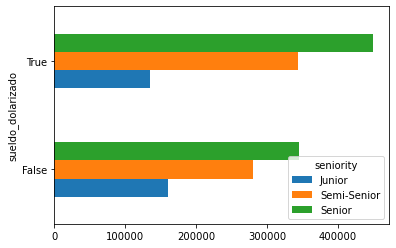

In [ ]:
df = (
    dataframe.groupby(["sueldo_dolarizado", "seniority"])
    .median()
    .unstack("seniority")["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .fillna(0)
)  # .sort_values(by=['salario_mensual_bruto_en_tu_moneda_local'], ascending=False)
df.plot(kind="barh")
charts["sueldo_dolarizado_salary_median"] = to_rechart(df)

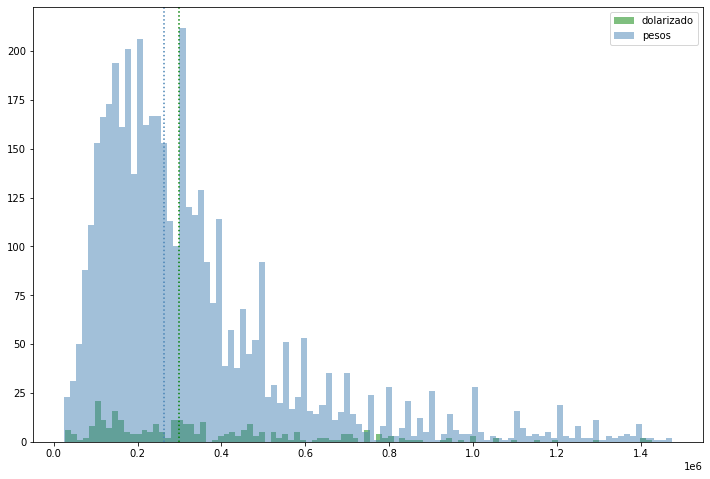

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(12, 8), sharex=True)
_dolar = dataframe[dataframe.sueldo_dolarizado].ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local
_no_dolar = dataframe[
    ~dataframe.sueldo_dolarizado
].ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local
ax.hist(_dolar, bins=100, label="dolarizado", alpha=0.5, color="green")
ax.hist(_no_dolar, bins=100, label="pesos", alpha=0.5, color="steelblue")
ax.axvline(_dolar.median(), color="green", linestyle="dotted")
ax.axvline(_no_dolar.median(), color="steelblue", linestyle="dotted")
ax.legend()

## CRYPTO

In [ ]:
# Determinamos la cantidad total de valores nulos.
df = dataframe['pagos_en_criptomonedas'].isnull().sum()
df

4687

In [ ]:
# Relleno las filas vacías con 'NO' para realizar análisis posterior.
dataframe['pagos_en_criptomonedas'] = dataframe['pagos_en_criptomonedas'].fillna('NO')

<ipython-input-1148-b2c506f40d57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pagos_en_criptomonedas'] = dataframe['pagos_en_criptomonedas'].fillna('NO')


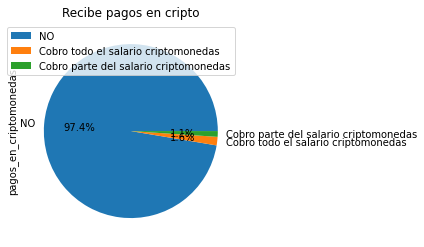

In [ ]:
# Proporción de aquellos que cobran en cripto y los que no.
dataframe['pagos_en_criptomonedas'].value_counts().plot(kind= "pie", autopct='%1.1f%%')
plt.title("Recibe pagos en cripto")
plt.legend()

In [ ]:
# Cuenta los valores únicos presentes en la columna especificada.
dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].value_counts()

0                            553
100%                          48
100                            7
50%                            6
0%                             5
-                              4
30%                            3
50                             3
25%                            3
$2,000                         2
70%                            2
%100                           2
90%                            2
60%                            2
85%                            2
35%                            1
10%                            1
350USDT                        1
3,600$                         1
$300,000                       1
55                             1
$4,000                         1
$500                           1
N/a                            1
$2,400                         1
80                             1
10                             1
20                             1
$86                            1
$3000 USDT                     1
5%        

In [ ]:
# Normalizo diferentes valores ingresados.
# Reemplazo los valores string por 0.
dataframe["que_porcentaje_o_monto_recibis_en_criptomonedas"] = dataframe["que_porcentaje_o_monto_recibis_en_criptomonedas"].replace(['0', '0%', 'N/a', 'Ninguno', 'No cobro en criptomonedas', 'No aplica ', 'no', '-'], 0)

<ipython-input-1151-b05101f14dfd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["que_porcentaje_o_monto_recibis_en_criptomonedas"] = dataframe["que_porcentaje_o_monto_recibis_en_criptomonedas"].replace(['0', '0%', 'N/a', 'Ninguno', 'No cobro en criptomonedas', 'No aplica ', 'no', '-'], 0)


In [ ]:
dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].unique().tolist()

[nan,
 '100%',
 0,
 '100',
 '25%',
 '10',
 '40',
 '40%',
 '%100',
 '$110,000',
 '$86',
 '85%',
 '1200',
 '$2,400',
 '90%',
 '3,600$',
 '$3000 USDT',
 '50%',
 '$150,000',
 '30%',
 '26%',
 '80',
 '$165,000',
 '15%',
 '$1,100',
 '%20',
 '20',
 '$100',
 '60%',
 '91%',
 '$2,000',
 '35%',
 '50',
 '$600',
 '%45',
 '$4,000',
 '$500',
 '55',
 '80%',
 '10%',
 '350USDT',
 '70%',
 '$300,000',
 '84%',
 '60',
 '5%']

In [ ]:
# Corrobora que no queden valores nulos.
dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].isnull().sum()

4133

In [ ]:
dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'] = dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].fillna(0)

<ipython-input-1154-f5444f8a7349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'] = dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].fillna(0)


In [ ]:
dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].value_counts()

0             4700
100%            48
100              7
50%              6
25%              3
50               3
30%              3
60%              2
90%              2
70%              2
%100             2
$2,000           2
85%              2
$300,000         1
$1,100           1
10%              1
%20              1
3,600$           1
$4,000           1
55               1
$600             1
$500             1
$2,400           1
80               1
$86              1
$3000 USDT       1
5%               1
84%              1
$150,000         1
$165,000         1
60               1
$110,000         1
26%              1
35%              1
%45              1
$100             1
350USDT          1
20               1
10               1
91%              1
40%              1
1200             1
80%              1
40               1
15%              1
Name: que_porcentaje_o_monto_recibis_en_criptomonedas, dtype: int64

In [ ]:
# Normaliza los datos para que queden expresados en porcentajes.
dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].replace({'$2,000': '$2000', '$300,000': '$300000','3,600$':'$3600','$4,000':'$4000', '$2,400':'$2400','$1,100':'$1100', '$150,000':'$150000','1200':'$1200', '350USDT':'$350 USDT', '$165,000':'$165000','$110,000':'$100000'})


0          0
1          0
2          0
3       100%
4          0
        ... 
5352       0
5354       0
5355       0
5356       0
5357       0
Name: que_porcentaje_o_monto_recibis_en_criptomonedas, Length: 4814, dtype: object

In [ ]:
dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].replace({'10':'10%', '20':'20%', '30':'30%', '40':'40%', '50':'50%', '55':'55%', '60':'60%', '80':'80%','100':'100%'})

0          0
1          0
2          0
3       100%
4          0
        ... 
5352       0
5354       0
5355       0
5356       0
5357       0
Name: que_porcentaje_o_monto_recibis_en_criptomonedas, Length: 4814, dtype: object

In [ ]:
dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].value_counts()

0             4700
100%            57
50%              6
30%              3
50               3
25%              3
$2,000           2
70%              2
90%              2
60%              2
85%              2
26%              1
35%              1
80%              1
$3000 USDT       1
$86              1
5%               1
80               1
$2,400           1
$500             1
$4,000           1
45%              1
$300,000         1
3,600$           1
20               1
10%              1
$1,100           1
10               1
350USDT          1
$600             1
15%              1
84%              1
40               1
55%              1
$150,000         1
1200             1
40%              1
91%              1
60               1
$165,000         1
$100             1
$110,000         1
20%              1
Name: que_porcentaje_o_monto_recibis_en_criptomonedas, dtype: int64

In [ ]:
dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'] = dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].replace({'10':'10%','%20':'20%','20':'20%','40':'40%','%45':'45%','50':'50%','55':'55%','60':'60%','80':'80%', '100':'100%','%100':'100%'})

<ipython-input-1178-b41aad842d1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'] = dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].replace({'10':'10%','%20':'20%','20':'20%','40':'40%','%45':'45%','50':'50%','55':'55%','60':'60%','80':'80%', '100':'100%','%100':'100%'})


In [ ]:
# Nuevamente se cuentan los valores a fin de corroborar que los valores estén correctamente expresados.
dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].value_counts()

0             4700
100%            57
50%              9
25%              3
30%              3
60%              3
70%              2
10%              2
90%              2
40%              2
85%              2
20%              2
$2,000           2
80%              2
350USDT          1
$3000 USDT       1
$86              1
5%               1
$2,400           1
$500             1
$4,000           1
45%              1
$300,000         1
3,600$           1
$100             1
$165,000         1
$1,100           1
$150,000         1
$600             1
15%              1
$110,000         1
55%              1
26%              1
1200             1
35%              1
91%              1
84%              1
Name: que_porcentaje_o_monto_recibis_en_criptomonedas, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

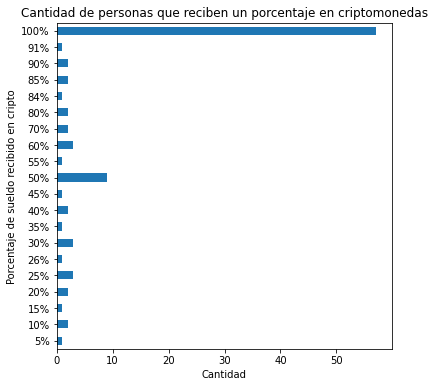

In [ ]:
porcentaje = dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].value_counts()[['5%','10%', '15%', '20%','25%', '26%', '30%','35%', '40%', '45%', '50%', '55%', '60%', '70%','80%','84%','85%','90%', '91%', '100%']]

porcentaje.plot(kind = "barh", figsize = (6, 6))
plt.title('Cantidad de personas que reciben un porcentaje en criptomonedas')

plt.xlabel('Cantidad')
plt.ylabel('Porcentaje de sueldo recibido en cripto')
plt.legend

In [ ]:
# De qué trabajan los que ganan en cripto?

In [ ]:
dataframe.loc[dataframe["que_porcentaje_o_monto_recibis_en_criptomonedas"]=="100%", "trabajo_de"].value_counts()

Developer                            32
Technical Leader                      6
SysAdmin / DevOps / SRE               5
QA / Tester                           3
Data Engineer                         3
Product Manager                       1
Customer Service/QA Tester            1
Consultant                            1
BI Analyst / Data Analyst             1
Developer fontend/ maquetador web     1
UX Designer                           1
Automation                            1
HR                                    1
Name: trabajo_de, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

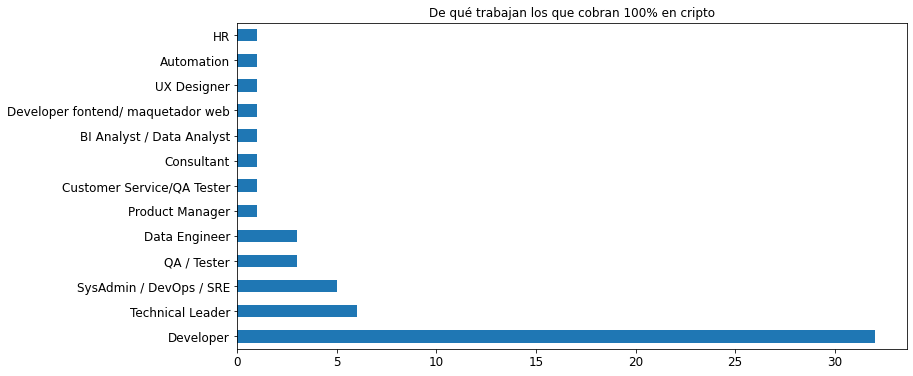

In [ ]:
dataframe.loc[dataframe["que_porcentaje_o_monto_recibis_en_criptomonedas"]=="100%", "trabajo_de"].value_counts().plot(
    kind="barh", figsize=(12,6), fontsize=12)
plt.title("De qué trabajan los que cobran 100% en cripto")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

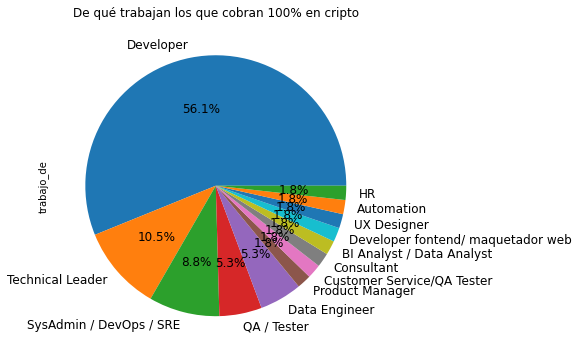

In [ ]:
dataframe.loc[dataframe["que_porcentaje_o_monto_recibis_en_criptomonedas"]=="100%", "trabajo_de"].value_counts().plot(
    kind="pie", figsize=(12,6), fontsize=12, autopct="%1.1f%%")
plt.title("De qué trabajan los que cobran 100% en cripto")
plt.legend

In [ ]:
sueldo_cripto = dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].value_counts()[['100%', '25%', '10%', '40%', '$110,000', '$86', '85%', '1200',
       '$2,400', '90%', '3,600$', '$3000 USDT', '50%', '$150,000', '30%',
       '26%', '80%', '$165,000', '15%', '$1,100', '20%', '$100', '60%',
       '91%', '$2,000', '35%', '$600', '45%', '$4,000', '$500', '55%',
       '350USDT', '70%', '$300,000', '84%', '5%']].sum()
print('Total de personas que cobran monto o porcentaje en cripto: ', sueldo_cripto)


sueldo_parte_cripto = dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].value_counts()[['5%','10%', '15%', '20%','25%', '26%', '30%','35%', '40%', '45%', '50%', '55%', '60%', '70%','80%','84%','85%','90%', '91%', '100%']].sum()
print('Total de personas que cobran porcentaje en cripto: ',sueldo_parte_cripto)

sueldo_todo_cripto = dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].value_counts()['100%']
print('Total de personas que cobran 100% sueldo en cripto: ', sueldo_todo_cripto)

sueldo_pct_cripto = dataframe['que_porcentaje_o_monto_recibis_en_criptomonedas'].value_counts()[['5%','10%', '15%', '20%','25%', '26%', '30%','35%', '40%', '45%', '50%', '55%', '60%', '70%','80%','84%','85%','90%', '91%']].sum()
print('Total de personas que cobran un porcentaje inferior al 100% de sueldo en cripto: ', sueldo_pct_cripto)

monto_fijo = sueldo_todo_cripto - sueldo_pct_cripto
monto_fijo

Total de personas que cobran monto o porcentaje en cripto:  114
Total de personas que cobran porcentaje en cripto:  97
Total de personas que cobran 100% sueldo en cripto:  57
Total de personas que cobran un porcentaje inferior al 100% de sueldo en cripto:  40


17

In [ ]:
# todas las cuentas para el análisis

print('Total de encuestados analizados: ',len(dataframe))
#print('Total de personas que cobran monto o porcentaje en cripto: ',sueldo_cripto)
#print('Representa %: ', round((sueldo_cripto/len(dataframe))*100,2),'%')
#print('Total de personas que cobran 100% sueldo en cripto: ', sueldo_todo_cripto)
#print('Representa %: ', round((sueldo_todo_cripto/sueldo_parte_cripto)*100, 2),'%')
#print('Total de personas que cobran parte de sueldo en cripto: ', sueldo_parte_cripto)
#print('Representa %: ', round((sueldo_parte_cripto/sueldo_cripto)*100, 2), '%')
#print('Total de personas que cobran un monto fijo de sueldo en cripto: ', monto_fijo)
#print('Representa %: ', round((monto_fijo/sueldo_cripto),2), '%')



Total de encuestados analizados:  4814


## ANÁLISIS CRYPTO
Del total de los encuestados analizados (4814 personas), sólo 114 reciben su sueldo en criptomonedas de forma parcial o total.

Estas 114 personas representan el 2,37% del total de la muestra.

De los 114, el 50% recibe la totalidad de su sueldo en moneda digital. 

Mientras que el otro 50% reciben un porcentaje o monto de su sueldo en criptomonedas, variando desde el 5% hacia el 91%.

A priori se puede considerar una práctica poco extendida, cuya evolución es posible de analizar con sucesivas encuestas al respecto.

En cuanto a la cantidad de personas que reciben un monto fijo, los valores son muy dispares entre sí, encontrándose montos en un rango de 86 - 300.000 pesos.

De acuerdo a la metodología actual no se puede recabar cuáles son las monedas digitales utilizadas como medio de pago. Se propone agregar una pregunta para tal fin en próximas encuestas.

    

### 2.3. Género

#### 2.3.1. Progresión Histórica

#### 2.3.2. Preparación

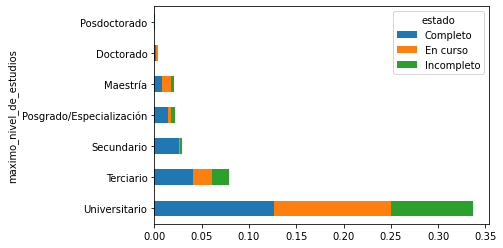

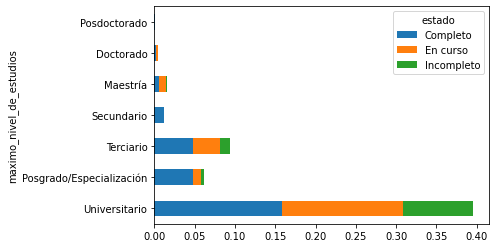

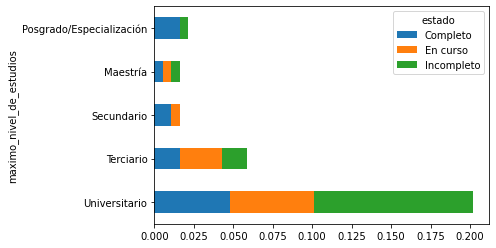

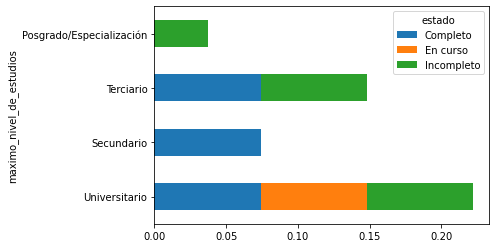

In [ ]:
df = dataframe.query('me_id_extra == "Hombre Cis"')
df = df.groupby(["maximo_nivel_de_estudios", "estado"])[
    "maximo_nivel_de_estudios"
].count().unstack("estado").fillna(0).sort_values(
    by=["Completo"], ascending=False
) / len(
    df
)
df.plot(kind="barh", stacked=True, logx=False)
charts["education_hombre_cis_stacked"] = to_rechart(df)

df = dataframe.query('me_id_extra == "Mujer Cis"')
df = df.groupby(["maximo_nivel_de_estudios", "estado"])[
    "maximo_nivel_de_estudios"
].count().unstack("estado").fillna(0).sort_values(
    by=["Completo"], ascending=False
) / len(
    df
)
df.plot(kind="barh", stacked=True, logx=False)
charts["education_mujer_cis_stacked"] = to_rechart(df)

df = dataframe.query('me_id_extra == "Prefiero No Decir"')
df = df.groupby(["maximo_nivel_de_estudios", "estado"])[
    "maximo_nivel_de_estudios"
].count().unstack("estado").fillna(0).sort_values(
    by=["Completo"], ascending=False
).sort_values(
    by=["En curso"], ascending=False
) / len(
    df
)
df.plot(kind="barh", stacked=True, logx=False)

charts["education_no_decir_stacked"] = to_rechart(df)

df = dataframe.query('me_id_extra == "No Binarie"')
df = df.groupby(["maximo_nivel_de_estudios", "estado"])[
    "maximo_nivel_de_estudios"
].count().unstack("estado").fillna(0).sort_values(
    by=["Completo"], ascending=False
).sort_values(
    by=["En curso"], ascending=False
) / len(
    df
)
df.plot(kind="barh", stacked=True, logx=False)

charts["education_no_bin_stacked"] = to_rechart(df)

#### 2.3.3. Salarios

In [ ]:
df = dataframe["trabajo_de"].value_counts(normalize=True, sort=True)
top_roles = df[:26].index

top_salary_roles = (
    dataframe.query("trabajo_de in @top_roles")
    .groupby(["trabajo_de"])
    .median()["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .fillna(0)
    .sort_values(0, ascending=False)
    .index.tolist()
)
top_salary_roles_mujer = (
    dataframe.query('trabajo_de in @top_roles & me_id_extra == "Mujer Cis"')
    .groupby(["trabajo_de"])
    .median()["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .fillna(0)
    .sort_values(0, ascending=False)
    .index.tolist()
)

# Roles mejores pagos en los que no se encuentran mujeres
display([rol for rol in top_salary_roles if rol not in top_salary_roles_mujer])

['VP / C-Level', 'DBA']

In [ ]:
df = dataframe[dataframe.me_id_extra.isin(enough_data)]
df = (
    df.groupby(["me_id_extra"])
    .median()
    .unstack()["de_que_fue_el_ajuste_total_acumulado"]
    .sort_values(ascending=False)
    / 100
)

df.plot(kind="barh")
charts["gender_salary_adjustment"] = to_rechart(df)

KeyError: 'de_que_fue_el_ajuste_total_acumulado'

#### 2.3.4. Experiencia

me_id_extra,Hombre Cis,Mujer Cis,No Binarie,Prefiero No Decir
actividad_principal,,,,
Otras industrias,0.805654,0.142756,0.004947,0.046643
Producto basado en Software,0.780329,0.172010,0.007366,0.040295
Servicios / Consultoría de Software / Digital,0.765235,0.184316,0.007493,0.042957


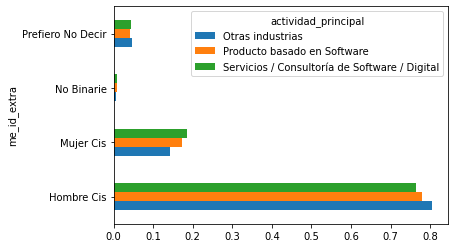

In [ ]:
df = dataframe[dataframe.me_id_extra.isin(enough_data)]
df = (
    df.groupby(["actividad_principal", "me_id_extra"])
    .agg({"me_id_extra": "count"})
    .groupby(level=0)
    .apply(lambda x: x / float(x.sum()))
    .unstack("me_id_extra")
)
df.columns = df.columns.droplevel(0)

display(df)
df.T.plot(kind="barh")
charts["actividad_principal_gender_percent"] = to_rechart(df)

me_id_extra,Hombre Cis,Mujer Cis,No Binarie,Prefiero No Decir
anos_de_experiencia_fibo,,,,
0-1,0.723447,0.240481,0.004008,0.032064
2,0.737844,0.230444,0.006342,0.025370
3,0.749436,0.221219,0.004515,0.024831
4-5,0.766055,0.181957,0.010703,0.041284
6-8,0.816794,0.131679,0.001908,0.049618
9-13,0.810147,0.130933,0.003273,0.055646
14-21,0.839031,0.103989,0.002849,0.054131
22-55,0.872180,0.071429,0.003759,0.052632


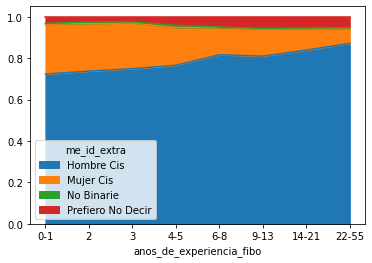

In [ ]:
df = dataframe.copy()
df = df[df.me_id_extra.isin(enough_data)]
df["anos_de_experiencia_fibo"] = pd.cut(
    df["anos_de_experiencia"].values,
    [0, 1, 2, 3, 5, 8, 13, 21, 55],
    labels=["0-1", "2", "3", "4-5", "6-8", "9-13", "14-21", "22-55"],
)
df = (
    df.groupby(["anos_de_experiencia_fibo", "me_id_extra"])
    .agg({"me_id_extra": "count"})
    .groupby(level=0)
    .apply(lambda x: x / float(x.sum()))
    .unstack("me_id_extra")
    .fillna(0)
)
df.columns = df.columns.droplevel(0)
display(df)
df.plot(kind="area")
charts["experience_gender_percent"] = to_rechart(df)

me_id_extra,Hombre Cis,Mujer Cis,No Binarie,Prefiero No Decir
anos_de_experiencia_fibo,,,,
0-1,158000.0,150000.0,84000.0,137500.0
2,211991.0,200000.0,265000.0,161500.0
3,251500.0,257500.0,212000.0,194700.0
4-5,309000.0,265060.0,250000.0,270000.0
6-8,350000.0,282090.0,239000.0,310000.0
9-13,350000.0,311000.0,545437.0,375000.0
14-21,350000.0,327500.0,570750.0,384000.0
22-55,366325.0,403407.0,159000.0,263000.0


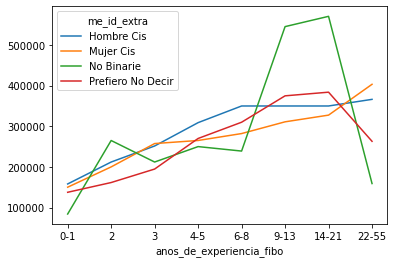

In [ ]:
df = dataframe.copy()
df = df[df.me_id_extra.isin(enough_data)]

df["anos_de_experiencia_fibo"] = pd.cut(
    df["anos_de_experiencia"].values,
    [0, 1, 2, 3, 5, 8, 13, 21, 55],
    labels=["0-1", "2", "3", "4-5", "6-8", "9-13", "14-21", "22-55"],
)
df = (
    df.groupby(["anos_de_experiencia_fibo", "me_id_extra"])
    .agg({"ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local": "median"})
    .unstack("me_id_extra")
    .fillna(0)
)
df.columns = df.columns.droplevel(0)
display(df)
df.plot(kind="line")
charts["experience_gender_salary_median"] = to_rechart(df)

me_id_extra,Hombre Cis,Mujer Cis,No Binarie,Prefiero No Decir
anos_de_experiencia_fibo,,,,
0-1,2.487535,2.350000,3.500000,2.125000
2,2.567335,2.559633,4.000000,2.166667
3,2.647590,2.846939,3.500000,2.363636
4-5,2.750499,2.689076,2.428571,2.222222
6-8,2.726636,2.681159,2.000000,2.615385
9-13,2.656566,2.537500,2.500000,2.794118
14-21,2.672326,2.561644,3.000000,2.315789
22-55,2.504310,2.789474,2.000000,1.928571


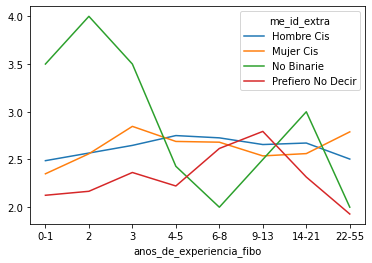

In [ ]:
df = dataframe.copy()
df = df[df.me_id_extra.isin(enough_data)]

df["anos_de_experiencia_fibo"] = pd.cut(
    df["anos_de_experiencia"].values,
    [0, 1, 2, 3, 5, 8, 13, 21, 55],
    labels=["0-1", "2", "3", "4-5", "6-8", "9-13", "14-21", "22-55"],
)
df = (
    df.groupby(["anos_de_experiencia_fibo", "me_id_extra"])
    .agg({"que_tan_conforme_estas_con_tus_ingresos_laborales": "mean"})
    .unstack("me_id_extra")
    .fillna(0)
)
df.columns = df.columns.droplevel(0)
display(df)
df.plot(kind="line")
charts["experience_gender_conformidad_mean"] = to_rechart(df)

#### 2.3.5. Discapacidad

0    0.965793
dtype: float64

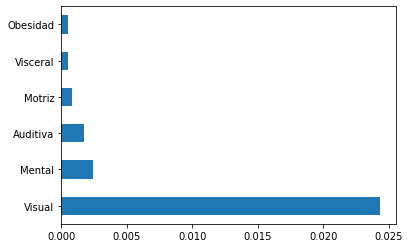

In [ ]:
df = dataframe["tenes_algun_tipo_de_discapacidad"].fillna("No reporta").value_counts(
    normalize=False, sort=True
) / len(dataframe)
no_reporta = df['No reporta']
no_reporta = pd.Series(no_reporta)
df = df.drop(labels=['No reporta'])


df[:6].plot(kind="barh")
display(no_reporta)
charts["discapacidad_percent"] = to_rechart(df, 7)
charts["n_persons_with_no_disabilities"] = to_rechart(no_reporta)

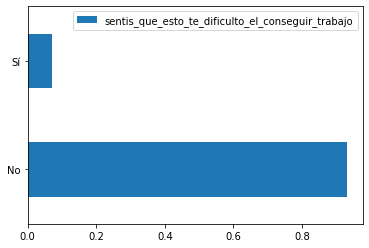

In [ ]:
# Quienes respondieron Sí o No, son quienes contestaron sobre discapacidad.  El resto es None
df = (
    dataframe["sentis_que_esto_te_dificulto_el_conseguir_trabajo"]
    .value_counts(normalize=True, sort=True)
    .to_frame()
)

df.plot(kind="barh")
charts["discapacidad_dificultad_percent"] = to_rechart(df)

### 2.4. Tecnología

#### 2.4.1. Plataformas más populares

'reduced in 0.004587'

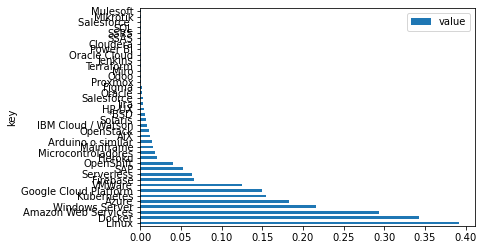

In [ ]:
df = (
    dataframe["plataformas_que_utilizas_en_tu_puesto_actual"]
    .str.extractall(r"(?P<value>[^,]+),? ?")["value"]
    .value_counts(normalize=False, sort=True)
    .to_frame()
    .rename_axis("key")
)
df.reset_index(level=0, inplace=True)

df = normalize_dataframe_column(
    df,
    "key",
    {
        "Google Cloud Platform/App Engine": "Google Cloud",
        "Sap": "SAP",
        "crm": "CRM",
        "Ninguna de las anteriores": "Ninguna/Ninguno",
        "^(nada|no|ningun[ao]|otros?|0|-|\.)$": "DELETEME",
    },
)

# Reagrupamos valores, sumándolos, luego de haber normalizado
df = df.query('key != "DELETEME"').groupby("key").sum()["value"].sort_values(
    ascending=False
).to_frame() / len(dataframe)

df = df[df.index != "Ninguna/Ninguno"]

df[:40].plot.barh()
charts["plataformas_que_utilizas_en_tu_puesto_actual"] = to_rechart(df[:40])

#### 2.4.2. Lenguajes de Programación más populares

'reduced in 0.026316'

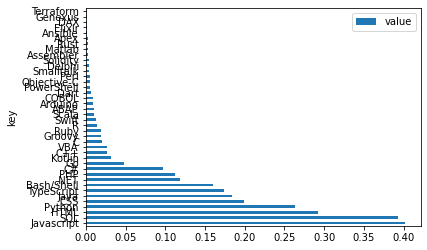

In [ ]:
df = (
    dataframe["lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual"]
    .str.extractall(r"(?P<value>[^,]+),? ?")["value"]
    .value_counts(normalize=False, sort=True)
    .to_frame()
    .rename_axis("key")
)
df.reset_index(level=0, inplace=True)

df = normalize_dataframe_column(
    df,
    "key",
    {
        "powershell": "PowerShell",
        "cobol": "COBOL",
        "Ninguno de los anteriores": "Ninguna/Ninguno",
        "^(nada|no|ningun[ao]|otros?|-|\.)$": "DELETEME",
    },
)

# Reagrupamos valores, sumándolos, luego de haber normalizado
df = df.query('key != "DELETEME"').groupby("key").sum()["value"].sort_values(
    ascending=False
).to_frame() / len(dataframe)

df = df[df.index != "Ninguna/Ninguno"]

df[:40].plot.barh()
charts["lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual"] = to_rechart(df[:40])

#### 2.4.3. Frameworks, Herramientas y Librerías más populares

'reduced in 0.039634'

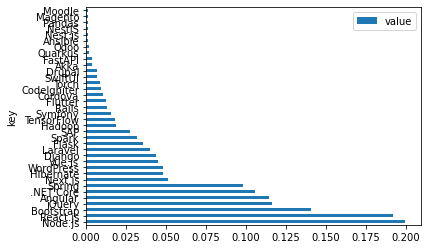

In [ ]:
df = (
    dataframe["frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual"]
    .str.extractall(r"(?P<value>[^,]+),? ?")["value"]
    .value_counts(normalize=False, sort=True)
    .to_frame()
    .rename_axis("key")
)
df.reset_index(level=0, inplace=True)

df = normalize_dataframe_column(
    df,
    "key",
    {
        ".*(node).*$": "Node.js",
        ".*Angular.*$": "Angular",
        ".*React.*$": "React.js",
        ".*Vue.*$": "Vue.js",
        ".*jquery.*$": "jQuery",
        ".*laravel.*$": "Laravel",
        ".*codeigniter.*$": "CodeIgniter",
        ".*struts.*$": "Struts",
        "Ninguno de los anteriores": "Ninguna/Ninguno",
        "^(nada|no|ningun[ao]|otros?|0|-|\.)$": "DELETEME",
    },
)

# Reagrupamos valores, sumándolos, luego de haber normalizado
df = df.query('key != "DELETEME"').groupby("key").sum()["value"].sort_values(
    ascending=False
).to_frame() / len(dataframe)

df = df[df.index != "Ninguna/Ninguno"]

df[:36].plot.barh()
charts["frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual"] = to_rechart(df[:36])

#### 2.4.4. Bases de Datos más populares

'reduced in 0.018405'

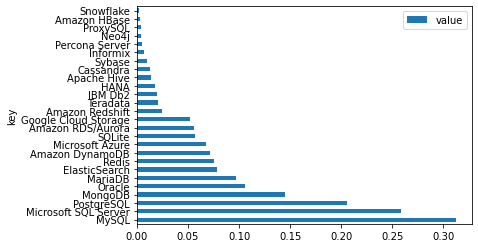

In [ ]:
df = (
    dataframe["bases_de_datos"]
    .str.extractall(r"(?P<value>[^,]+),? ?")["value"]
    .value_counts(normalize=False, sort=True)
    .to_frame()
    .rename_axis("key")
)
df.reset_index(level=0, inplace=True)

df = normalize_dataframe_column(
    df,
    "key",
    {
        ".*(sybase).*$": "Sybase",
        "Microsoft Azure \(Tables": "Microsoft Azure",
        "Ninguna de las anteriores": "Ninguna/Ninguno",
        "^(SQL|CosmosDB|etc\)|otros?|0|-|\.)$": "DELETEME",
    },
)

# Reagrupamos valores, sumándolos, luego de haber normalizado
df = df.query('key != "DELETEME"').groupby("key").sum()["value"].sort_values(
    ascending=False
).to_frame() / len(dataframe)

df = df[df.index != "Ninguna/Ninguno"]

df[:26].plot.barh()
charts["bases_de_datos"] = to_rechart(df[:26])

#### 2.4.5. Herramientas de QA / Testing más populares

'reduced in 0.155914'

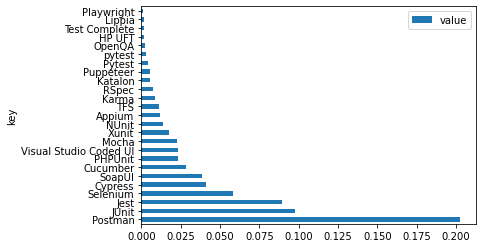

In [ ]:
df = (
    dataframe["qa_testing"]
    .str.extractall(r"(?P<value>[^,]+),? ?")["value"]
    .value_counts(normalize=False, sort=True)
    .to_frame()
    .rename_axis("key")
)
df.reset_index(level=0, inplace=True)

df = normalize_dataframe_column(
    df,
    "key",
    {
        ".*(ningun[oa]|no|nada|otros?|0|\.).*$": "DELETEME",
        ".*(junit).*$": "JUnit",
        ".*(jest).*$": "Jest",
        "Ninguna de las anteriores": "Ninguna/Ninguno",
    },
)

# Reagrupamos valores, sumándolos, luego de haber normalizado
df = df.query('key != "DELETEME"').groupby("key").sum()["value"].sort_values(
    ascending=False
).to_frame() / len(dataframe)

df = df[df.index != "Ninguna/Ninguno"]

df[:25].plot.barh()
charts["qa_testing"] = to_rechart(df[:25])

#### 2.4.6. IDEs más populares

'reduced in 0.119718'

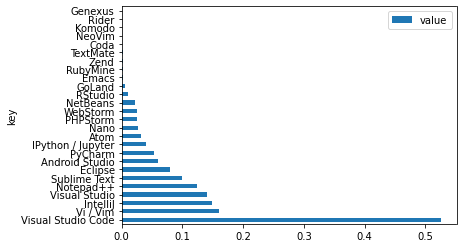

In [ ]:
df = (
    dataframe["ides"]
    .str.extractall(r"(?P<value>[^,]+),? ?")["value"]
    .value_counts(normalize=False, sort=True)
    .to_frame()
    .rename_axis("key")
)
df.reset_index(level=0, inplace=True)

df = normalize_dataframe_column(
    df,
    "key",
    {
        "^.*(Visual Studio|VS).*$": "Visual Studio",
        "^.*(Visual Studio Code|VS ?Code|Code).*$": "Visual Studio Code",
        ".*(Sublime)( Text)?.*$": "Sublime Text",
        ".*(webstorm).*$": "WebStorm",
        "^(vi|vim)$": "Vi / Vim",
        "^(jdeveloper)$": "JDeveloper",
        "^(goland)$": "GoLand",
        "^(neovim)$": "NeoVim",
        "IBM integración toolkit": "IBM Integration Bus",
        "^(rubymine)$": "RubyMine",
        "Ninguno de los anteriores": "Ninguna/Ninguno",
        "^(no( uso.*| util.*)?|none|ningun[ao]|0|No s[eé]|nada|-|\.)$": "DELETEME",
    },
)

# Reagrupamos valores, sumándolos, luego de haber normalizado
df = df.query('key != "DELETEME"').groupby("key").sum()["value"].sort_values(
    ascending=False
).to_frame() / len(dataframe)

df = df[df.index != "Ninguna/Ninguno"]

df[:26].plot.barh()
charts["ides"] = to_rechart(df[:26])

### 2.5. Trabajo

#### 2.5.1. Tipos de contrato

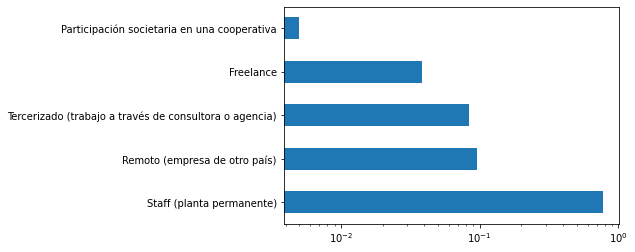

In [ ]:
df = dataframe["tipo_de_contrato"].value_counts(normalize=True, sort=True)

df.plot(kind="barh", logx=True)
charts["tipo_de_contrato_percent"] = to_rechart(df)

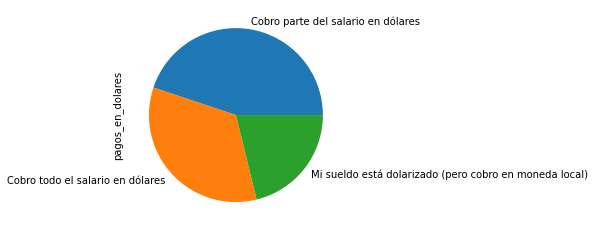

In [ ]:
df = dataframe["pagos_en_dolares"].value_counts(normalize=True, sort=True)
df.plot.pie()
charts["pagos_en_dolares_percent"] = to_rechart(df)

#### 2.5.2. Compensación

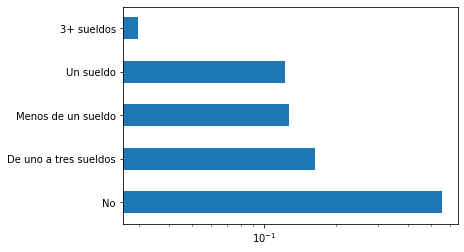

In [ ]:
#DUPLICADO DEL 2.2.6
df = dataframe["recibis_algun_tipo_de_bono"].value_counts(normalize=True, sort=True)

df.plot(kind="barh", logx=True)
charts["recibis_algun_tipo_de_bono"] = to_rechart(df)

'reduced in 0.190661'

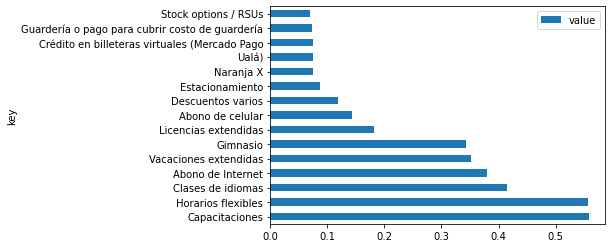

In [ ]:
df = (
    dataframe["con_que_beneficios_contas"]
    .str.extractall(r"(?P<value>[^,]+),? ?")["value"]
    .value_counts(normalize=False, sort=True)
    .to_frame()
    .rename_axis("key")
)
df.reset_index(level=0, inplace=True)

df = normalize_dataframe_column(
    df,
    "key",
    {
        "(.*Vacaciones flexibles.*|Días off|.*cumpleaños libre.*|.*Día libre.*)$": "Vacaciones extendidas",
        ".*Licencias?.*$": "Licencias extendidas",
        "horarios? flexibles?$": "Horarios flexibles",
        "(.*capacitaci[oó]n(es)?.*|.*cursos?.*)$": "Capacitaciones",
        "bebidas?$": "Bebidas",
        "(golosinas?|.*snac?ks?|Snacks)$": "Snacks",
        ".*(Clarín 365).*$": "Descuentos varios",
        "(.*Descuentos varios.*|.*gift card)": "Descuentos varios",
        "0": "DELETEME",
        "(etc\)|Club La Nación)$": "DELETEME",
        ".que tiene que ver el tema": "DELETEME",
        "(no|.*Nada.*|Ning[uú]n[ao]?( de las anteriores)?)$": "DELETEME",
        "(.*prepaga.*|OSDE|.*obra social.*)$": "Prepaga",
        "(frut[ao]s?)$": "Frutas",
        "(facturas?)": "Facturas",
        "(.*home off?ice.*|.*WFH.*|.*home work.*|100% remoto|Remoto|Full remote)$": "WFH",
        "(.*d[oó]lares.*|Sueldo dolarizado)$": "Sueldo dolarizado",
        "(.*gimnasio.*|.*gym.*)$": "Gimnasio",
        "(.*cochera.*|.*estacionamiento.*)$": "Estacionamiento",
        "(.*combustibles?.*|.*vi[aá]ticos?.*|.*cabify.*|.*transporte.*|.*remis.*|.*turismo.*|.*vuelos.*)$": "Viáticos",
        "(.*sueldos? ex.*)$": "Sueldos extra",
        "(.*eventos?.*|entradas?)$": "Eventos",
        "(.*pileta)$": "Pileta",
    },
)

# Reagrupamos valores, sumándolos, luego de haber normalizado
df = df.query('key != "DELETEME"').groupby("key").sum()["value"].sort_values(
    ascending=False
).to_frame() / len(dataframe)

df[:15].plot.barh()
charts["con_que_beneficios_contas"] = to_rechart(df[:15])

In [ ]:
df = dataframe["de_que_fue_el_ajuste_total_acumulado"].copy()
df = df.groupby(
    pd.cut(
        df.values,
        [0, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144],
        labels=[
            "0-1",
            "2",
            "3",
            "4-5",
            "6-8",
            "9-13",
            "14-21",
            "22-34",
            "35-55",
            "56-89",
            "90-144",
        ],
        include_lowest=True,
    )
).count() / len(df)
display(df)
df.plot.barh()
charts["de_que_fue_el_ajuste_total_acumulado"] = to_rechart(df.sort_index())

TypeError: '<' not supported between instances of 'int' and 'str'

#### 2.5.3. Características de la Empresa

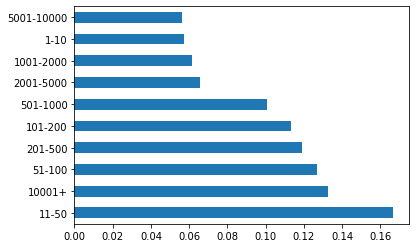

In [ ]:
df = dataframe["cantidad_de_personas_en_tu_organizacion"].value_counts(normalize=True, sort=True)

df.plot(kind="barh", logx=False)
charts["cantidad_de_personas_en_tu_organizacion"] = to_rechart(df)

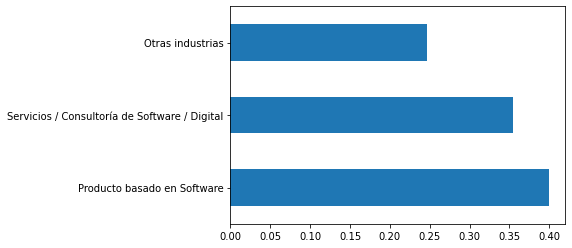

In [ ]:
df = dataframe["actividad_principal"].value_counts(normalize=True, sort=True)

df.plot(kind="barh", logx=False)
charts["actividad_principal"] = to_rechart(df)

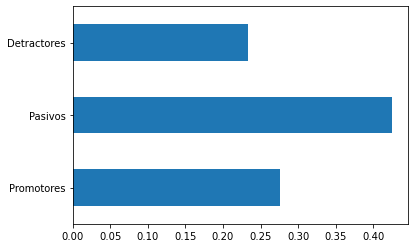

In [ ]:
df = dataframe["la_recomendas_como_un_buen_lugar_para_trabajar"].copy()
# https://es.wikipedia.org/wiki/Net_Promoter_Score
df = df.groupby(
    pd.cut(df.values, [0, 6, 8, 10], labels=["Detractores", "Pasivos", "Promotores"])
).count() / len(df)
df = df.iloc[::-1]  # reverse order

df.plot.barh()
charts["la_recomendas_como_un_buen_lugar_para_trabajar"] = to_rechart(df)

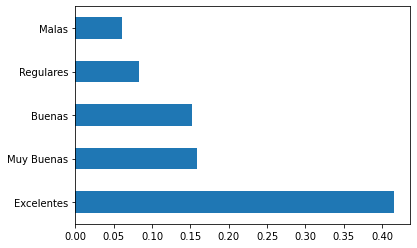

In [ ]:
df = dataframe["como_calificas_las_politicas_de_diversidad_e_inclusion"]
df = df.groupby(
    pd.cut(
        df.values,
        [0, 3, 5, 7, 8, 10],
        labels=["Malas", "Regulares", "Buenas", "Muy Buenas", "Excelentes"],
    )
).count() / len(df)
df = df.iloc[::-1]

df.plot.barh()
charts["politicas_diversidad_e_inclusion"] = to_rechart(df)

'reduced in 0.132495'

,value
key,
Quarkslab,0.155208
MercadoLibre,0.152655
Globant,0.052417
Medallia,0.019571
Accenture,0.013104
Google,0.012934
MuleSoft,0.009020
Santander,0.008509
Salesforce,0.008509


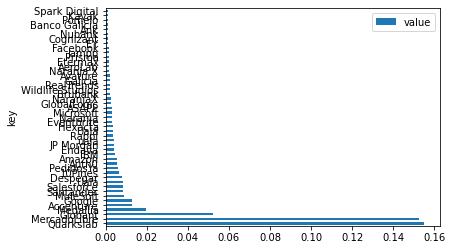

In [ ]:
#Verificar esta celda de codigo. Para el set 2021.02 hay un registro que trae en el campo "cuales_consideras...." la palabra 'Quarkslab' muchas veces separado por coma
# por eso para este set, la empresa Quarkslab aparece como puntera con el 15%
df = (
    dataframe[
        "cuales_consideras_que_son_las_mejores_empresas_de_it_para_trabajar_en_este_momentoen_tu_ciudad"
    ]
    .str.extractall(r"(?P<value>[^,]+),? ?")["value"]
    .value_counts(normalize=False, sort=True)
    .to_frame()
    .rename_axis("key")
)
df.reset_index(level=0, inplace=True)

df = normalize_dataframe_column(
    df,
    "key",
    {
        "^(ningun[ao]|-|no lo se|desconozco|ni idea|no s[ée]|Son todas una mierda\.|bancos?)$": "DELETEME",
        "^(mercadolibre|mercado libre|meli|ml|mercado ?pago)$": "MercadoLibre",
        "^(medallia|medalia)$": "Medallia",
        "^(despegar\.?(com)?)$": "Despegar",
        "^(mulesoft)$": "Mulesoft",
        "^(globant)$": "Globant",
        "^(google)$": "Google",
        "^(auth0)$": "Auth0",
        "^(rappi)$": "Rappi",
        "^(jampp?)$": "Jampp",
        "^(asapp|asap)$": "ASAPP",
        "^(ibm|i\.b\.m\.?)$": "IBM",
        "^(aws|amazon)$": "Amazon",
        "^(eventbrite)$": "Eventbrite",
        "^(saleforce|salesforce)$": "Salesforce",
        "^(olx|o\.l\.x\.?)$": "OLX",
        "^(10 ?pines)$": "10Pines",
        "^(microsoft)$": "Microsoft",
        "^(jp ?morgan)$": "JP Morgan",
        "^(elementum)$": "Elementum",
        "^(bell?atrix)$": "Belatrix",
        "^(nubank)$": "Nubank",
        "^(etermax)$": "Etermax",
        "^(facebook)$": "Facebook",
        "^(hexacta)$": "Hexacta",
        "^(oracle)$": "Oracle",
        "^(avature)$": "Avature",
        "^(everis)$": "Everis",
        "^(baires ?dev)$": "NubaBairesDevnk",
        "^(stensul)$": "Stensul",
        "^(satel? ?logic\.?)$": "Satellogic",
        "^(scale)$": "Scale",
        "^(aerolab)$": "AeroLab",
        "^(rga|r/ga)$": "R/GA",
        "^(accenture)$": "Accenture",
        "^(olapic)$": "Olapic",
        "^(logicalis)$": "Logicalis",
        "^(mule ?(soft)?)$": "MuleSoft",
        "^(soft ?vision)$": "SoftVision",
        "^(global ?logic)$": "GlobalLogic",
        "^(pedidos ?ya)$": "PedidosYa",
        "^(decentra ?land)$": "DecentraLand",
        "^(real ?trends)$": "RealTrends",
        "^(nubi ?lmetri(x|cs))$": "Nubimetrics",
        "^(santander( tec.*))$": "Santander",
        "^(wildlife|wildlife*)$": "Wildlife Studios",
    },
)

# Reagrupamos valores, sumándolos, luego de haber normalizado
df = df.query('key != "DELETEME"').groupby("key").sum()["value"].sort_values(
    ascending=False
).to_frame() / len(dataframe)
display(df[:47])
df[:47].plot.barh()

#### Distribución de los roles mejor pagos

In [ ]:
dataframe_top10=dataframe.copy()
dataframe_top10['sueldo_total_o_parcial_en_dolares']=~pd.isna(dataframe_top10['pagos_en_dolares'])*1

q90=dataframe_top10['ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local'].quantile(.90)

# nos quedamos con el top 10% de los que mas ganan
salario_top10=dataframe_top10[(dataframe_top10['ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local'] > q90)]


sub_set=pd.DataFrame({'Cantidad' : salario_top10.groupby('trabajo_de').size() ,
              'Promedio' : round(salario_top10.groupby(["trabajo_de"])["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"].mean()),
              'Mediana' : salario_top10.groupby(["trabajo_de"])["ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local"].median(),
              'Porcentaje_dolarizados' : round(salario_top10.groupby(["trabajo_de"])["sueldo_total_o_parcial_en_dolares"].mean(),2)
                })

sub_set = sub_set.sort_values('Mediana',ascending=False)
sub_set = sub_set.query("Cantidad >= 5")
sub_set
charts["salary_by_role_top10_perc"] = to_rechart(sub_set)

In [ ]:
sub_set

,Cantidad,Promedio,Mediana,Porcentaje_dolarizados
trabajo_de,,,,
Data Engineer,21,981682.0,1000000.0,0.81
VP / C-Level,9,1027499.0,996000.0,0.78
QA / Tester,18,971548.0,925000.0,0.89
Architect,15,908250.0,900000.0,0.60
Product Manager,6,937333.0,900000.0,0.67
Developer,186,946698.0,900000.0,0.88
SysAdmin / DevOps / SRE,46,939759.0,883500.0,0.78
Technical Leader,62,934849.0,863750.0,0.71
Manager / Director,49,911903.0,844000.0,0.41


Notar que la explicación de que QA esté tan arriba en la mediana se debe al gran porcentaje de sueldos dolarizados.

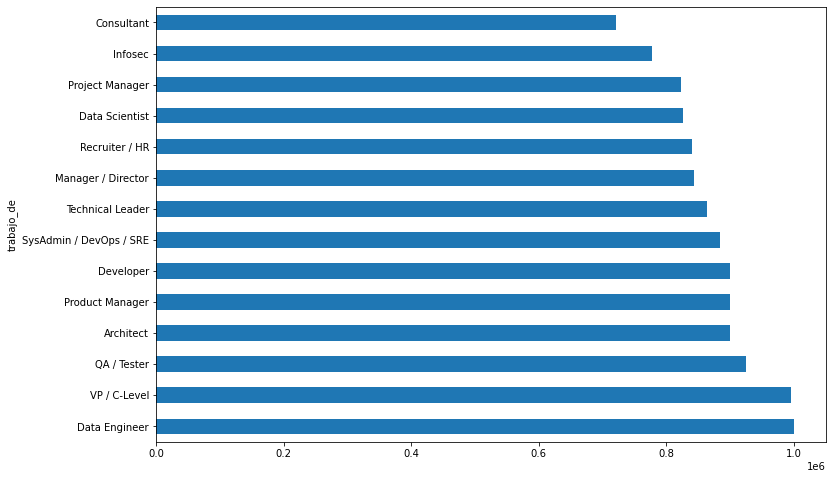

In [ ]:
sub_set=sub_set.sort_values('Mediana',ascending=False)

plt.figure(figsize=(12, 8))
sub_set['Mediana'].plot(kind="barh", ax=plt.gca())
charts["salary_by_role_top10"] = to_rechart(sub_set)

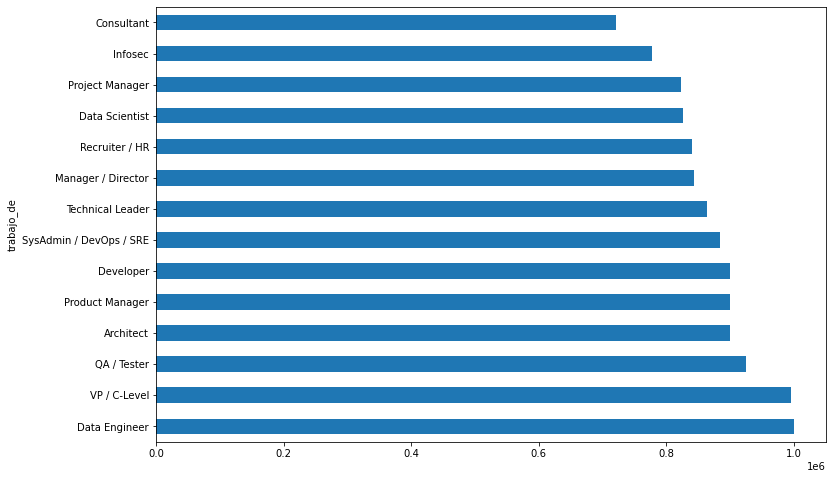

In [ ]:
#solo con la mediana
sub_set = sub_set[['Mediana']]
plt.figure(figsize=(12, 8))
sub_set['Mediana'].plot(kind="barh", ax=plt.gca())
charts["salary_by_role_top10"] = to_rechart(sub_set)

Variable 'me_identifico' con posiciones de liderazgo (a cargo una o mas personas)

In [ ]:
import numpy as np
dataframe['cuantas_personas_a_cargo_tenes']=np.where(dataframe['gente_a_cargo']>=1, "Sí", "No")

df = dataframe[dataframe.me_id_extra.isin(enough_data)]
df = (
    df[[ "me_id_extra","cuantas_personas_a_cargo_tenes"]]
    .value_counts(normalize=True, sort=True)
    .groupby(level=0)
    .apply(lambda x: x / float(x.sum()))
    .unstack("me_id_extra")
)

display(df)
df.T.plot(kind="barh")
charts["leadership_gender_percent"] = to_rechart(df)

KeyError: 'gente_a_cargo'

In [ ]:
dataframe[["me_id_extra"]].value_counts(normalize=True, sort=True)

me_id_extra      
Hombre Cis           0.772786
Mujer Cis            0.174583
Prefiero No Decir    0.040223
No Binarie           0.005777
Agénero              0.002995
Hombre Trans         0.002567
Mujer Trans          0.001070
dtype: float64

'Cantidad de hijos' y sueldo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


me_id_extra,Hombre Cis,Mujer Cis,No Binarie,Prefiero No Decir
tenes_hijos_menores_str,,,,
No,163800.0,130750.0,140000.0,156000.0
Si,210000.0,160500.0,252000.0,250000.0


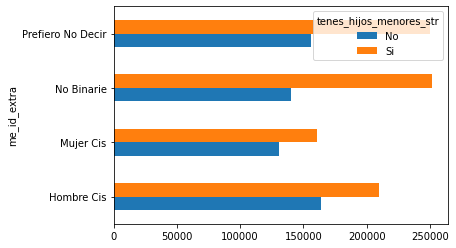

In [ ]:
import numpy as np
dataframe['tenes_hijos_menores_str']=np.where(dataframe['tenes_hijosas_menores_de_edad']>=1, "Si", "No")

df = dataframe[dataframe.me_id_extra.isin(enough_data)]
df = (
    df.groupby(["me_id_extra", "tenes_hijos_menores_str"])
    .median()["salario_mensual_o_retiro_bruto_en_tu_moneda_local"]
    .unstack("me_id_extra")
)

display(df)
df.T.plot(kind="barh")
#df.plot(kind="barh")

Diferencias en el ranking entre lenguajes de programacion (dataset previo y 2021.02)

In [ ]:
#tomamos datos previos y normalizamos
csv_url = "https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/2017.02.csv"


raw_dataframe = None
source = requests.get(
    csv_url.format(dataset_metadata["year"], dataset_metadata["part"])
).content
raw_dataframe = pd.read_csv(
   io.StringIO(source.decode("utf-8")),
    skiprows=dataset_metadata["skiprows"],
    thousands=".",
   decimal=",",
)


# resultados que no pertenezcan a Argentina quedan fuera de este análisis
columns_to_remove = [
    "Bolivia",
    "Chile",
    "Colombia",
    "Cuba",
    "Costa Rica",
    "Ecuador",
    "El Salvador",
    "Guatemala",
    "Honduras",
    "México",
    "Nicaragua",
    "Panamá",
    "Paraguay",
    "Perú",
    "Puerto Rico",
    "República Dominicana",
    "Uruguay",
    "Venezuela",
]

#raw_dataframe.drop(columns_to_remove, axis=1, inplace=True)

import re

regex_white_chars = re.compile(r"\s+")
regex_non_alphanum = re.compile(r"\W+_?", re.I)

raw_dataframe.columns = (
    raw_dataframe.columns.str.strip()
    .str.lower()
    .str.replace(regex_white_chars, "_")
    .str.replace(regex_non_alphanum, "")
    .str.translate(
        "ñáéíóú".maketrans({"ñ": "n", "á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u"})
    )
)

# Eliminamos los datos que no pertenezcan a Argentina
#raw_dataframe = raw_dataframe[raw_dataframe["estoy_trabajando_en"] == "Argentina"]

dataframe_prev = raw_dataframe.copy()

#display([column for column in dataframe202101.columns])

In [ ]:
df01 = (
    dataframe_prev["lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual"]
    .str.extractall(r"(?P<value>[^,]+),? ?")["value"]
    .value_counts(normalize=False, sort=True)
    .to_frame()
    .rename_axis("key")
)
df01.reset_index(level=0, inplace=True)

df01 = normalize_dataframe_column(
    df01,
    "key",
    {
        "powershell": "PowerShell",
        "cobol": "COBOL",
        "Ninguno de los anteriores": "Ninguna/Ninguno",
        "^(nada|no|ningun[ao]|otros?|-|\.)$": "DELETEME",
    },
)

# Reagrupamos valores, sumándolos, luego de haber normalizado
df01 = df01.query('key != "DELETEME"').groupby("key").sum()["value"].sort_values(
    ascending=False
).to_frame() / len(dataframe_prev)

df01 = df01[df01.index != "Ninguna/Ninguno"]
df01=df01[:15]
df01=df01.rank(method='first',ascending=False)

#df[:40].plot.barh()

NameError: name 'dataframe_prev' is not defined

In [ ]:
df02 = (
    dataframe["lenguajes_de_programacion_o_tecnologias"]
    .str.extractall(r"(?P<value>[^,]+),? ?")["value"]
    .value_counts(normalize=False, sort=True)
    .to_frame()
    .rename_axis("key")
)
df02.reset_index(level=0, inplace=True)

df02 = normalize_dataframe_column(
    df02,
    "key",
    {
        "powershell": "PowerShell",
        "cobol": "COBOL",
        "Ninguno de los anteriores": "Ninguna/Ninguno",
        "^(nada|no|ningun[ao]|otros?|-|\.)$": "DELETEME",
    },
)

# Reagrupamos valores, sumándolos, luego de haber normalizado
df02 = df02.query('key != "DELETEME"').groupby("key").sum()["value"].sort_values(
    ascending=False
).to_frame() / len(dataframe)

df02 = df02[df02.index != "Ninguna/Ninguno"]
df02=df02[:15]
df02=df02.rank(method='first',ascending=False)
#df[:40].plot.barh()

'reduced in 0.033175'

In [ ]:
leng_rank=pd.merge(df01,df02,on='key')
leng_rank.rename(columns={'value_x': "2017.02","value_y":"2021.02"},inplace=True)
leng_rank['Diferencia'] = leng_rank['2017.02'] - leng_rank['2021.02']
display(leng_rank)
#charts["prog_lang_rank"] = to_rechart(leng_rank)

,2017.02,2021.02,Diferencia
key,,,
Javascript,1.0,1.0,0.0
HTML,2.0,3.0,-1.0
CSS,4.0,6.0,-2.0
Java,5.0,5.0,0.0
PHP,6.0,9.0,-3.0
.NET,7.0,10.0,-3.0
Python,8.0,4.0,4.0
C#,10.0,11.0,-1.0


## 3. Publicación

In [ ]:
import json

# formateamos valores flotantes para ahorrar caracteres (#macritips)
display(
    json.dumps(
        json.loads(
            json.dumps(charts, allow_nan=False),
            parse_float=lambda x: round(float(x), 5),
        )
    )
)

'{"total_surveyed": 5358, "total_analyzed_surveyed": 4814, "regions_percent": {"data": [{"name": "Ciudad Aut\\u00f3noma de Buenos Aires", "value": 0.50789}, {"name": "Buenos Aires", "value": 0.2042}, {"name": "C\\u00f3rdoba", "value": 0.09202}, {"name": "Santa Fe", "value": 0.06336}, {"name": "Mendoza", "value": 0.02784}, {"name": "Entre R\\u00edos", "value": 0.01309}, {"name": "Chaco", "value": 0.01018}, {"name": "Salta", "value": 0.00935}, {"name": "R\\u00edo Negro", "value": 0.00872}, {"name": "Misiones", "value": 0.00872}, {"name": "Neuqu\\u00e9n", "value": 0.00831}, {"name": "Tucum\\u00e1n", "value": 0.0081}, {"name": "Corrientes", "value": 0.00789}, {"name": "Jujuy", "value": 0.00644}, {"name": "San Juan", "value": 0.00582}, {"name": "Chubut", "value": 0.00457}, {"name": "San Luis", "value": 0.00332}, {"name": "La Rioja", "value": 0.0027}, {"name": "Tierra del Fuego", "value": 0.00208}, {"name": "Santiago del Estero", "value": 0.00187}, {"name": "Santa Cruz", "value": 0.00145}, {

In [ ]:
#import json
#with open('charts.json', 'w', encoding='utf-8') as f:
#    json.dump(charts, f, ensure_ascii=False, indent=4, default=str)

Exportar datos preparados a Google Sheets

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe

gc = gspread.authorize(GoogleCredentials.get_application_default())

sh = gc.create('/content/drive/MyDrive/Colab Notebooks/encuesta_sysarmy/encuesta_clean_202102')

# Open our new sheet and add some data.
worksheet = gc.open('encuesta_clean_202102').sheet1

set_with_dataframe(worksheet, dataframe) 



Existe un 45% de aumento en la mediana salarial respecto al período anterior (2021.01).
Para verificar la integridad de los datos, graficamos el histograma de la variable salario, junto a los quintiles. Luego replicamos este mismo análisis con los datos de la encuesta anterior (2021.01) y verificamos que los valores eran similares.

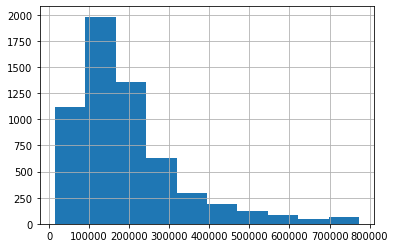

In [ ]:
dataframe['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].hist()

In [ ]:
display(dataframe['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].quantile(.2))
display(dataframe['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].quantile(.4))
display(dataframe['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].quantile(.6))
display(dataframe['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].quantile(.8))
display(dataframe['salario_mensual_o_retiro_bruto_en_tu_moneda_local'].mean())

94892.0

140000.0

185000.0

260090.0

194581.03027399594

In [ ]:
#Respecto a 2021.01
#el promedio vario 46%
#el percentil 80 varió 44%
#el percentil 60 varió 42%
#el percentil 20 varió 40%